In [1]:
import dimers_util 
import numpy as np
import matplotlib.pyplot as plt
import struct
import sys
import os
import scipy.sparse as sparse
import time
import pickle
from importlib import reload 
reload(dimers_util)
from dimers_util import *

In [696]:
L16 = 16
H16 = load_data(L16)
times = 10000
d16=0
nums16=200

c_rho16 = classical_evolution(L16, times, H16,d=d16,nums=nums16)
q_rho16 = quantum_evolution(L16, times, H16,d=d16)

1595 10538
1595 4404
1595 48
#######################


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:38<00:00, 259.37it/s]


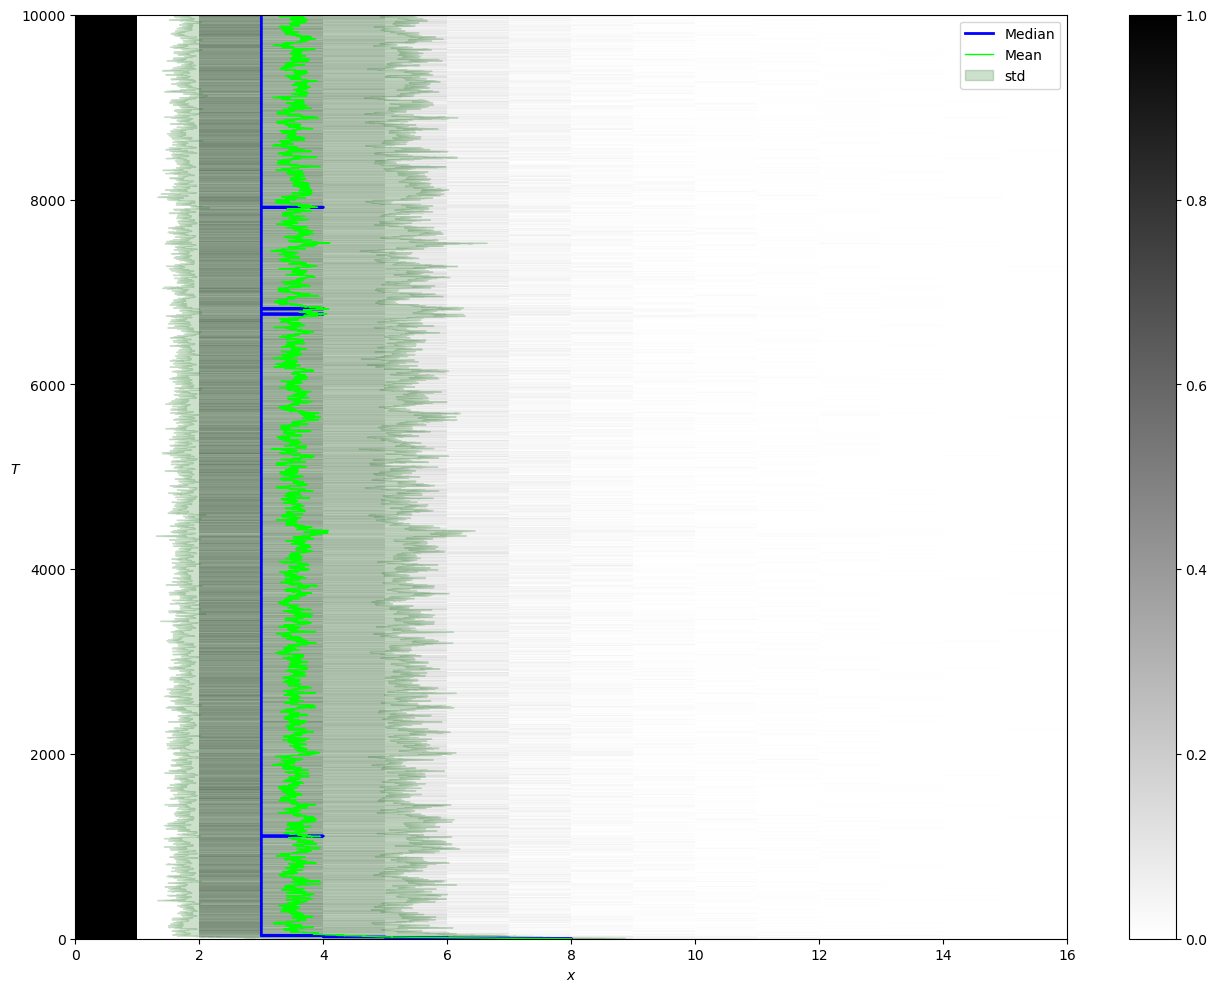

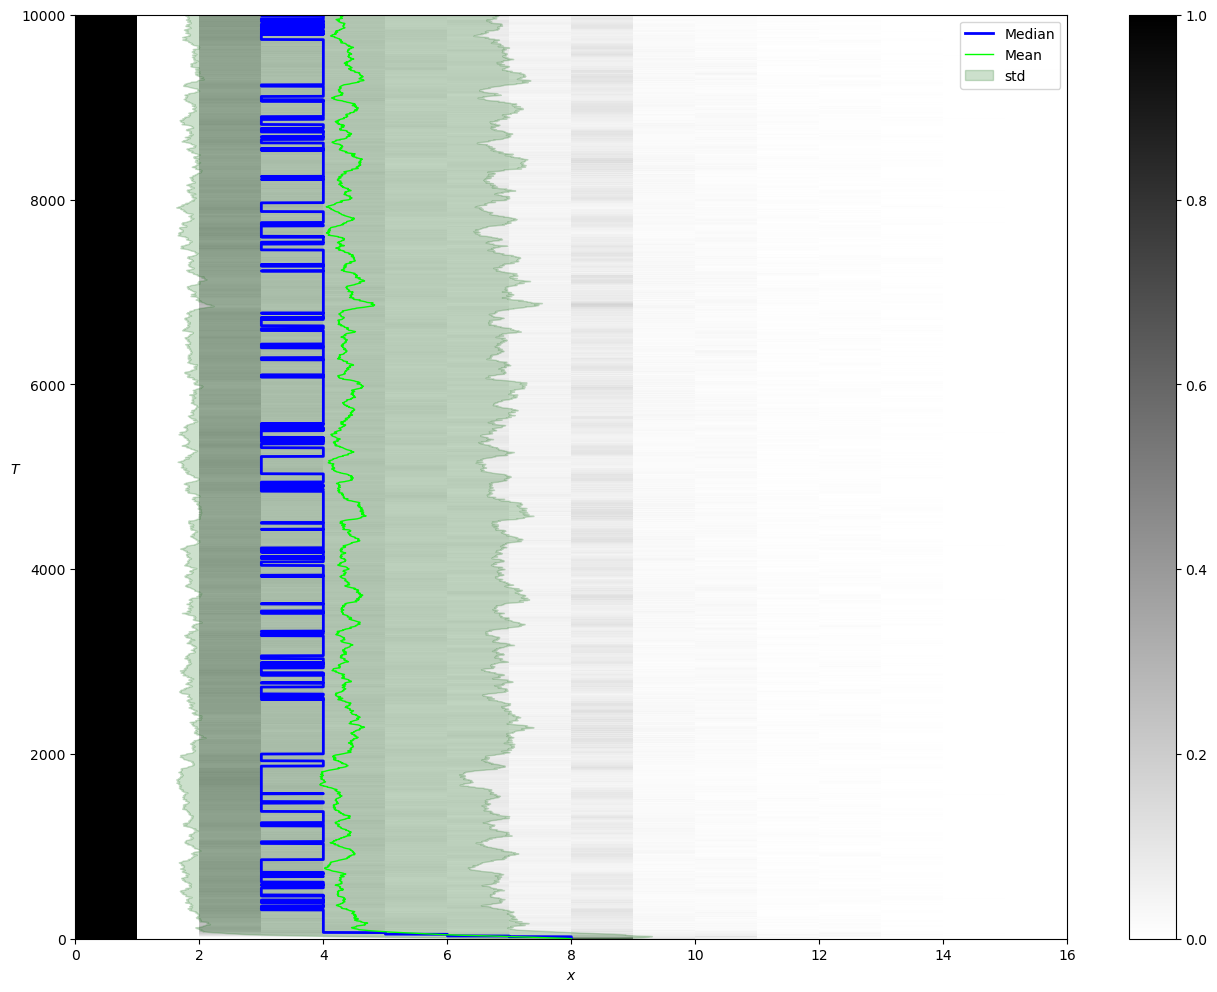

In [697]:
plot_rho(analyze(c_rho16), 16)
plot_rho(analyze(q_rho16), 16)

J=0.1


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 331.44it/s]


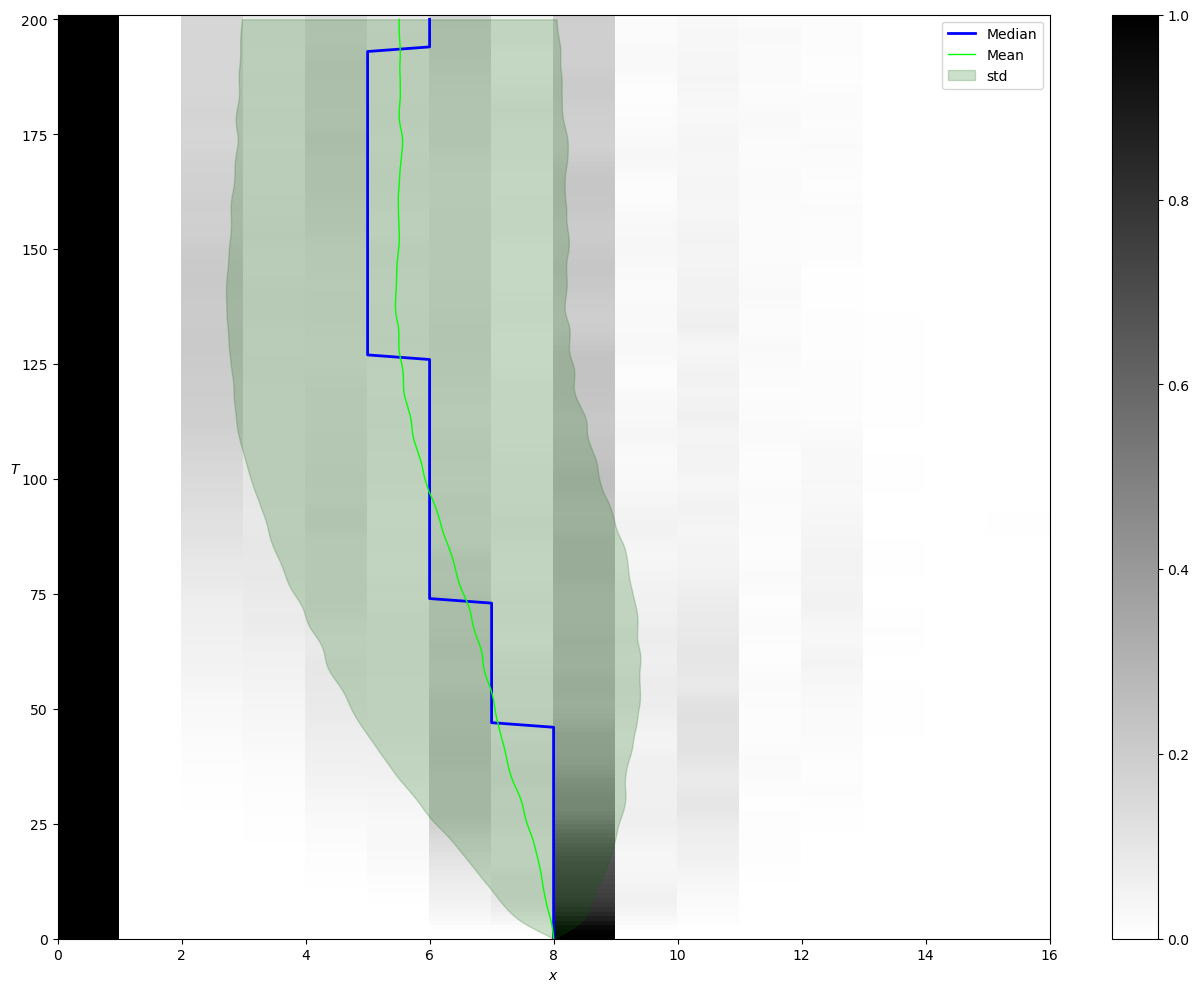

J=0.2


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 342.66it/s]


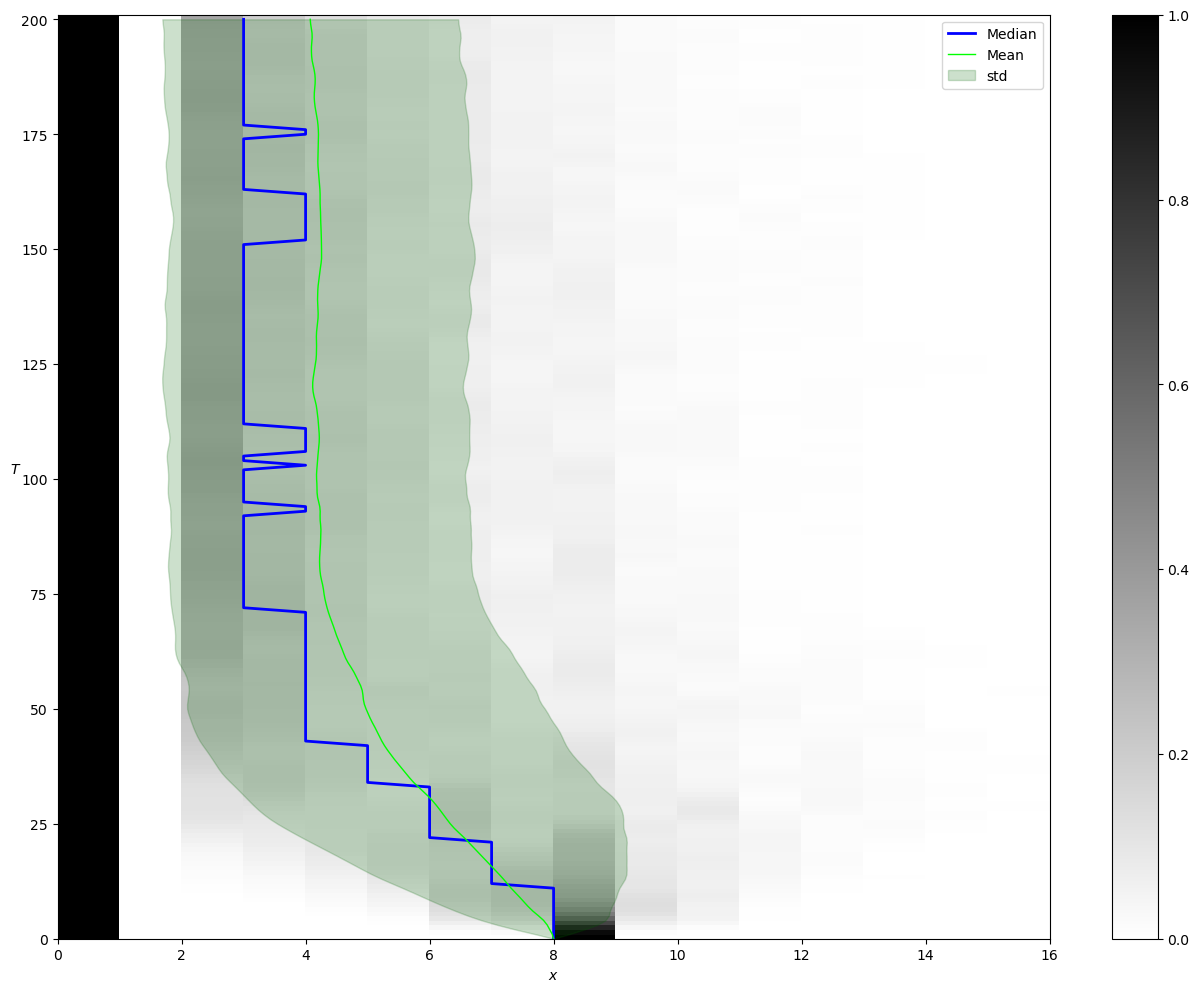

J=0.30000000000000004


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 335.83it/s]


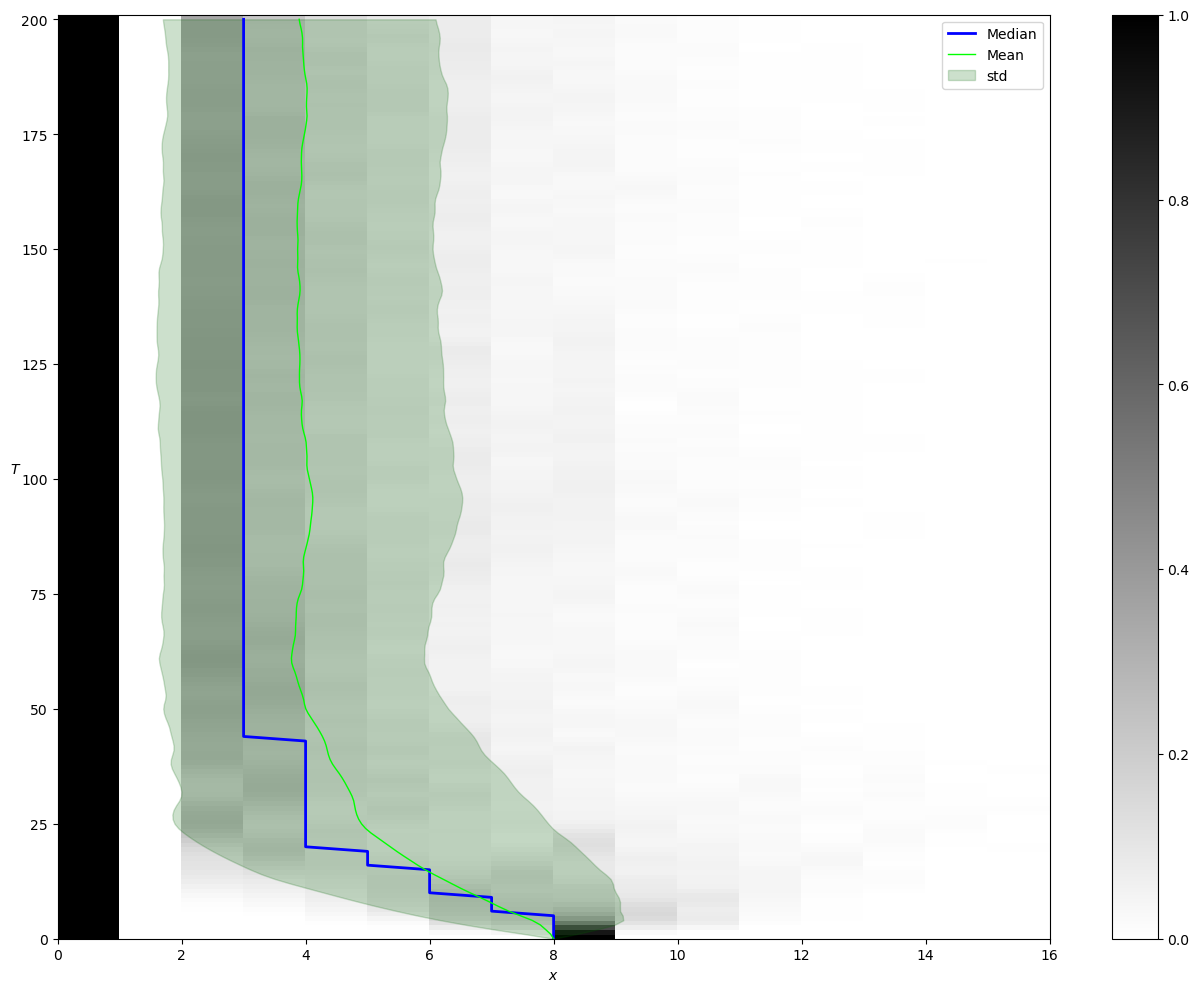

J=0.4


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 308.47it/s]


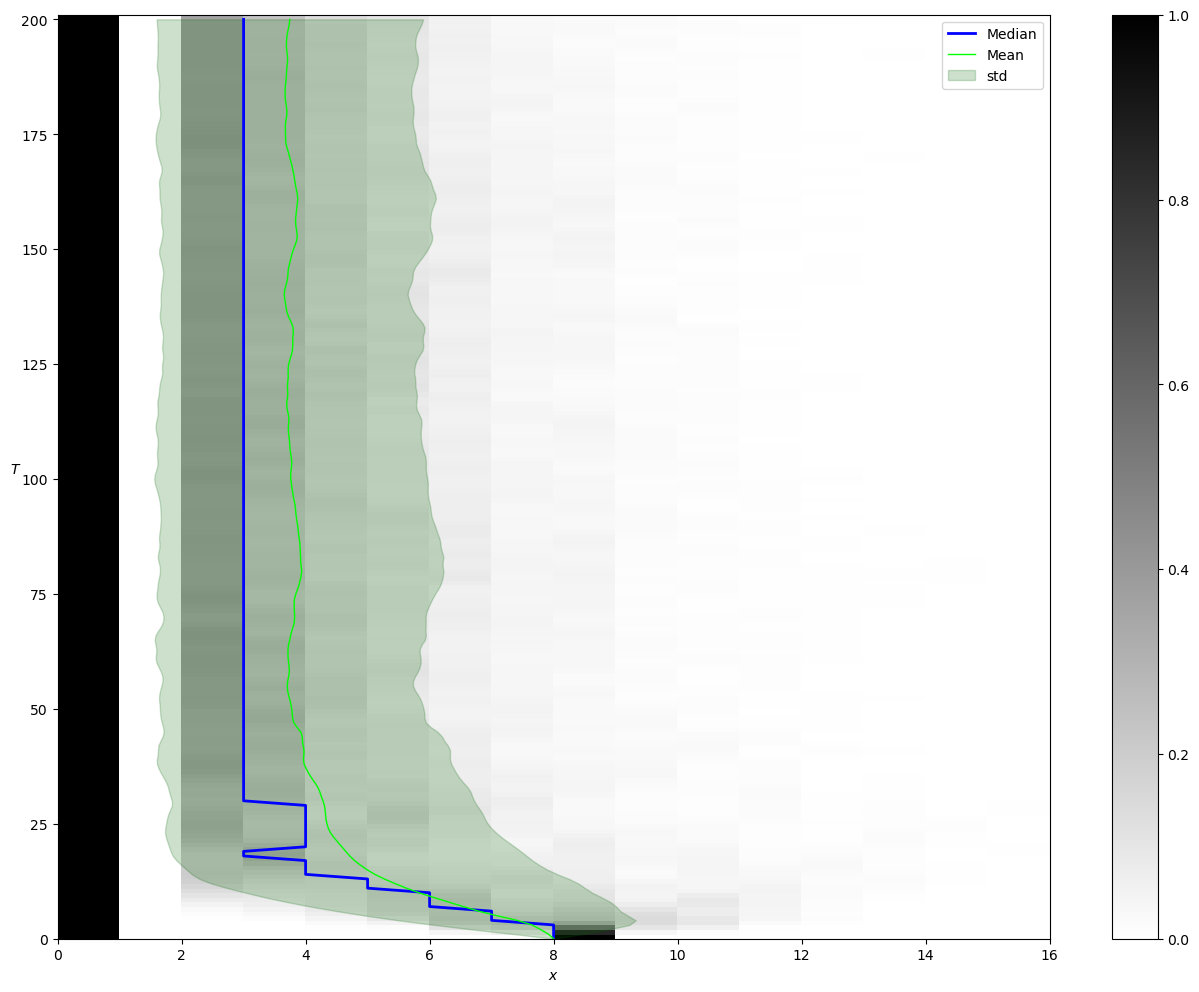

J=0.5


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 272.75it/s]


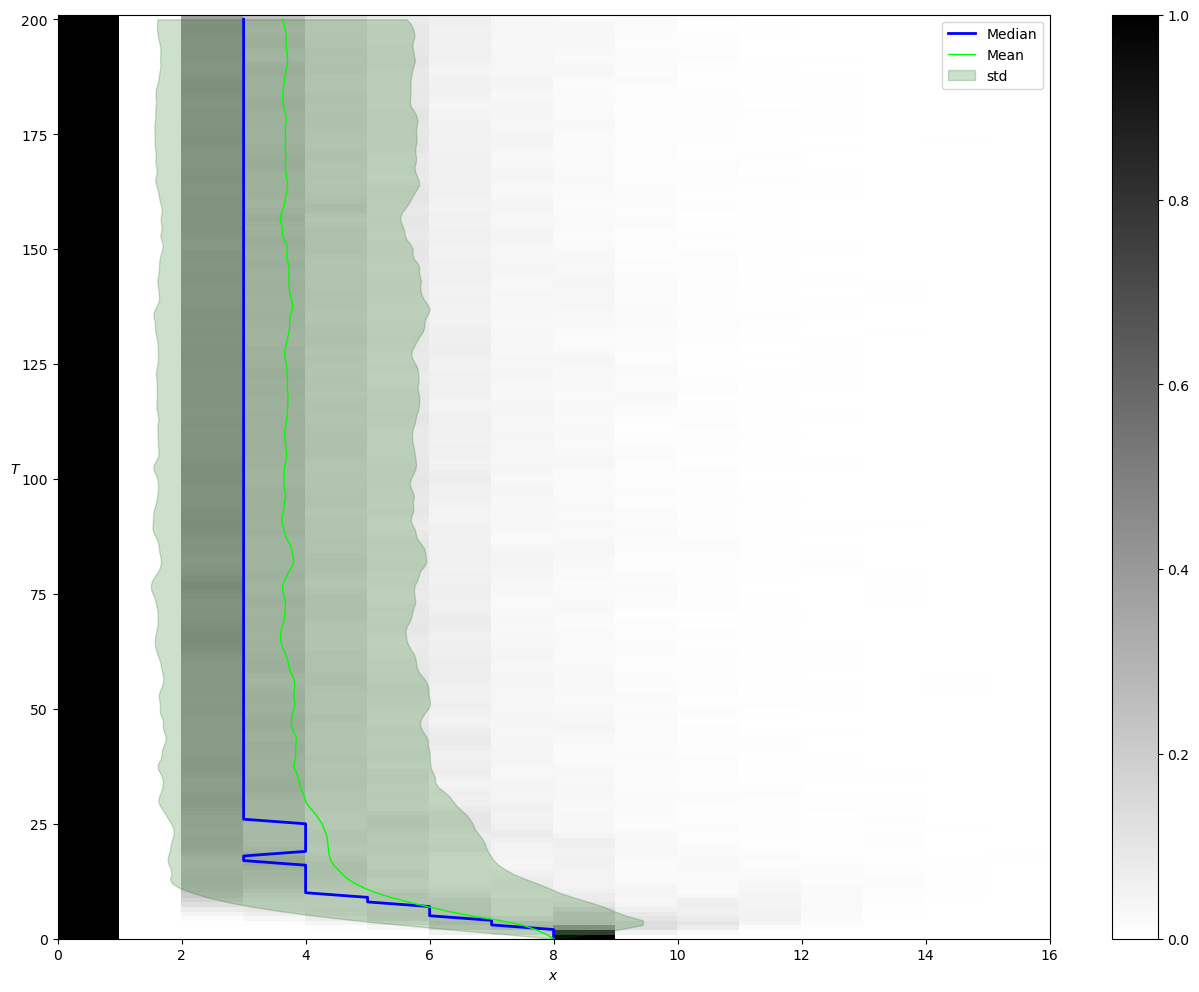

J=0.6


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 292.96it/s]


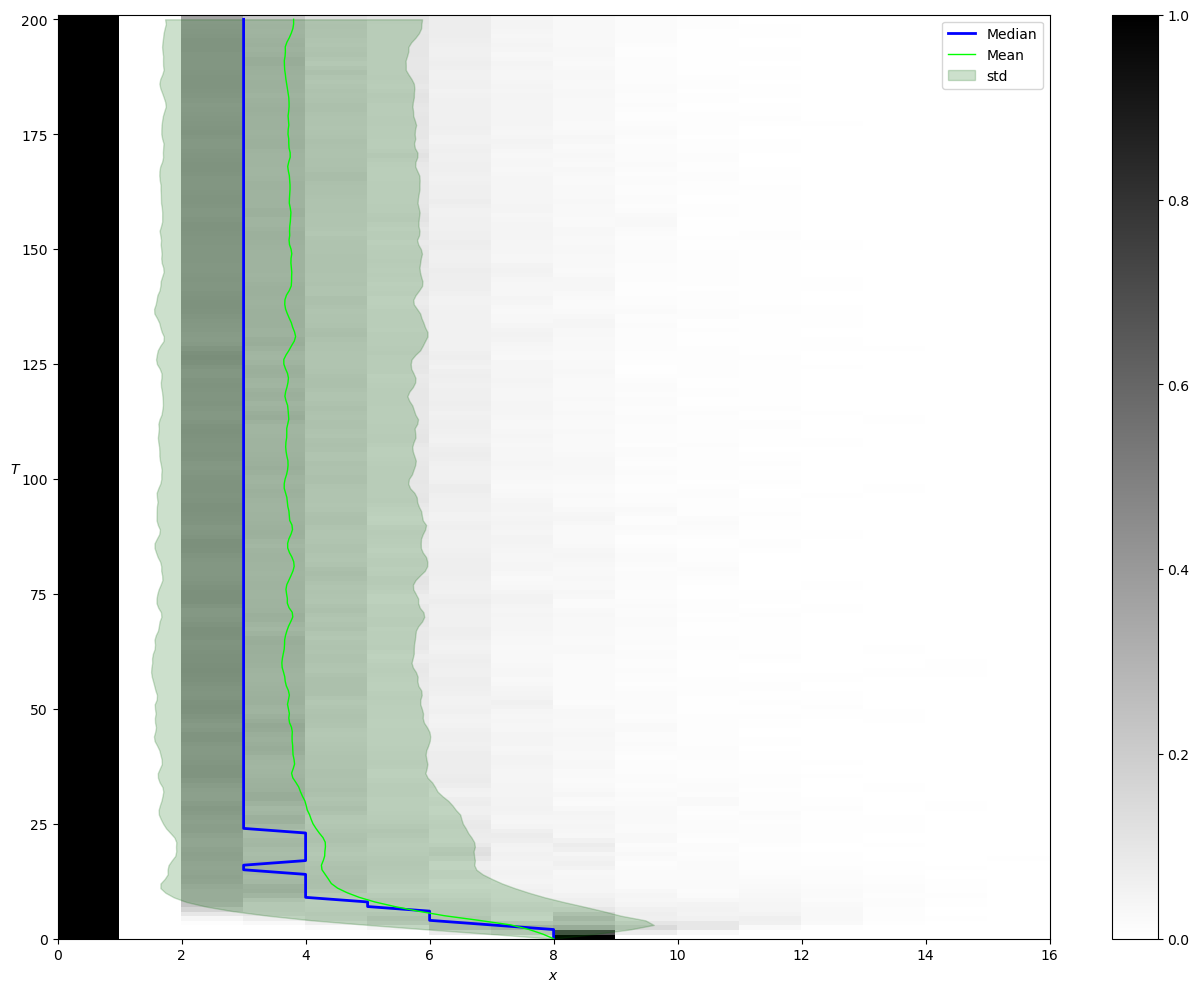

J=0.7000000000000001


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 276.22it/s]


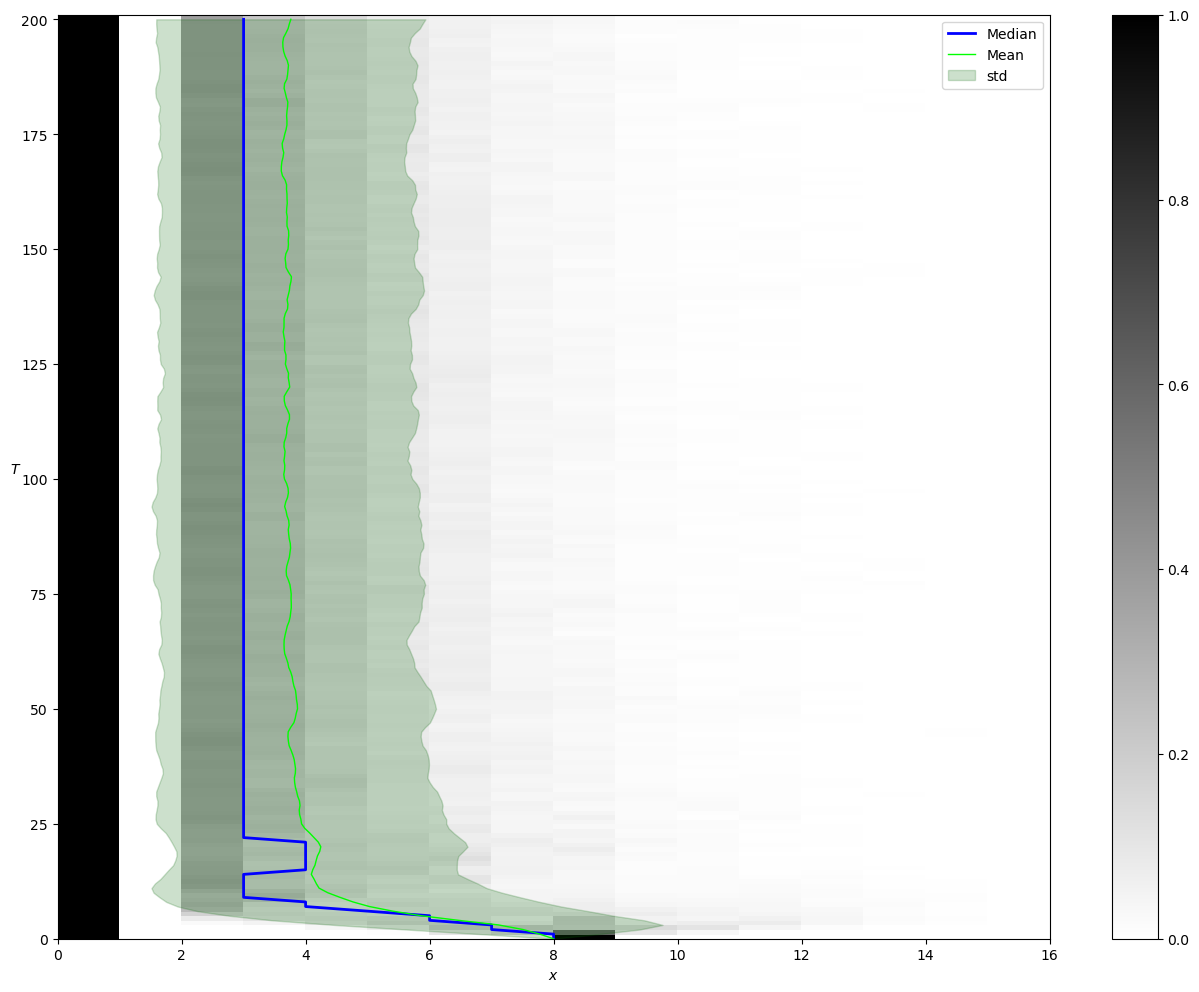

J=0.8


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 274.48it/s]


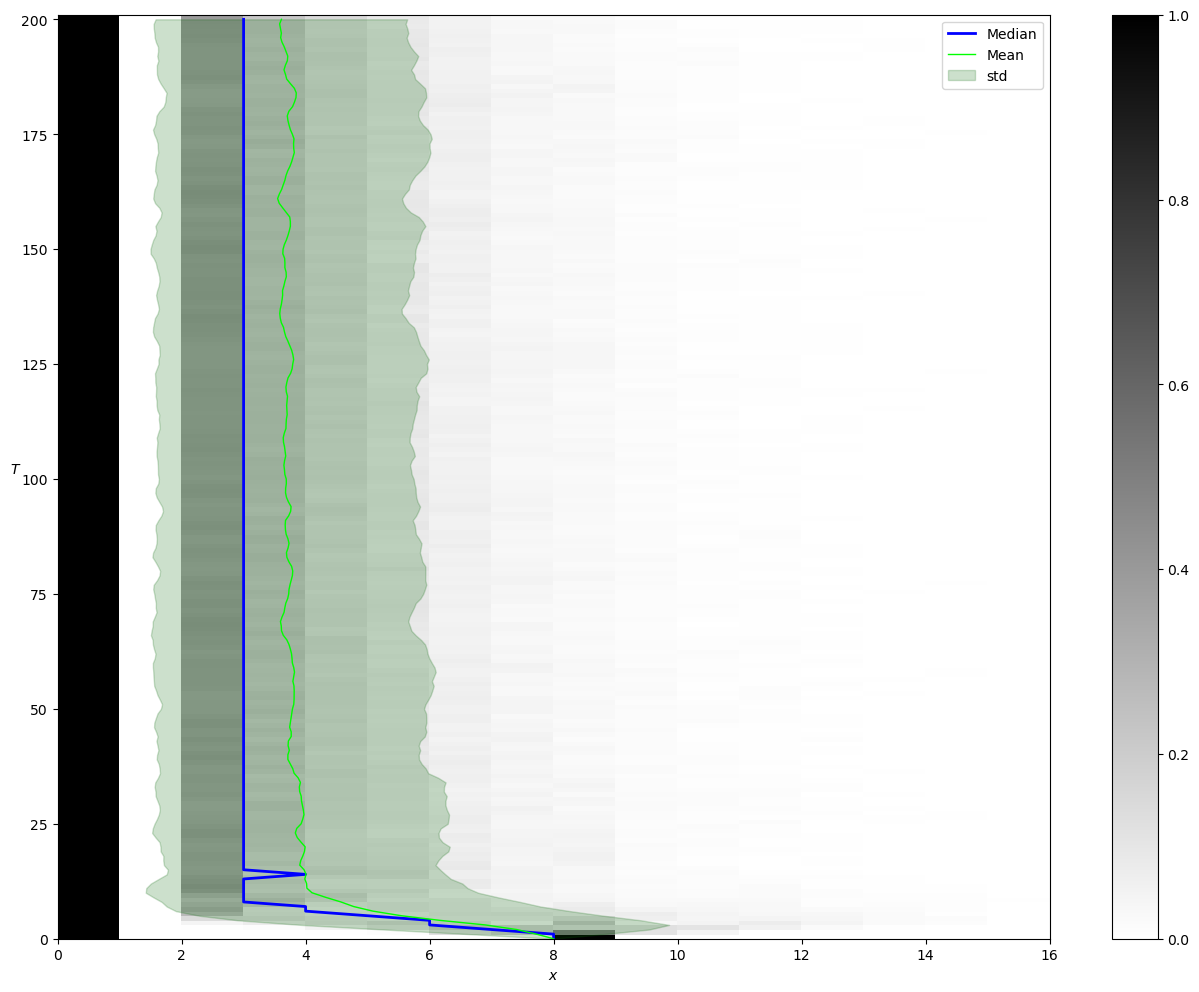

J=0.9


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 268.30it/s]


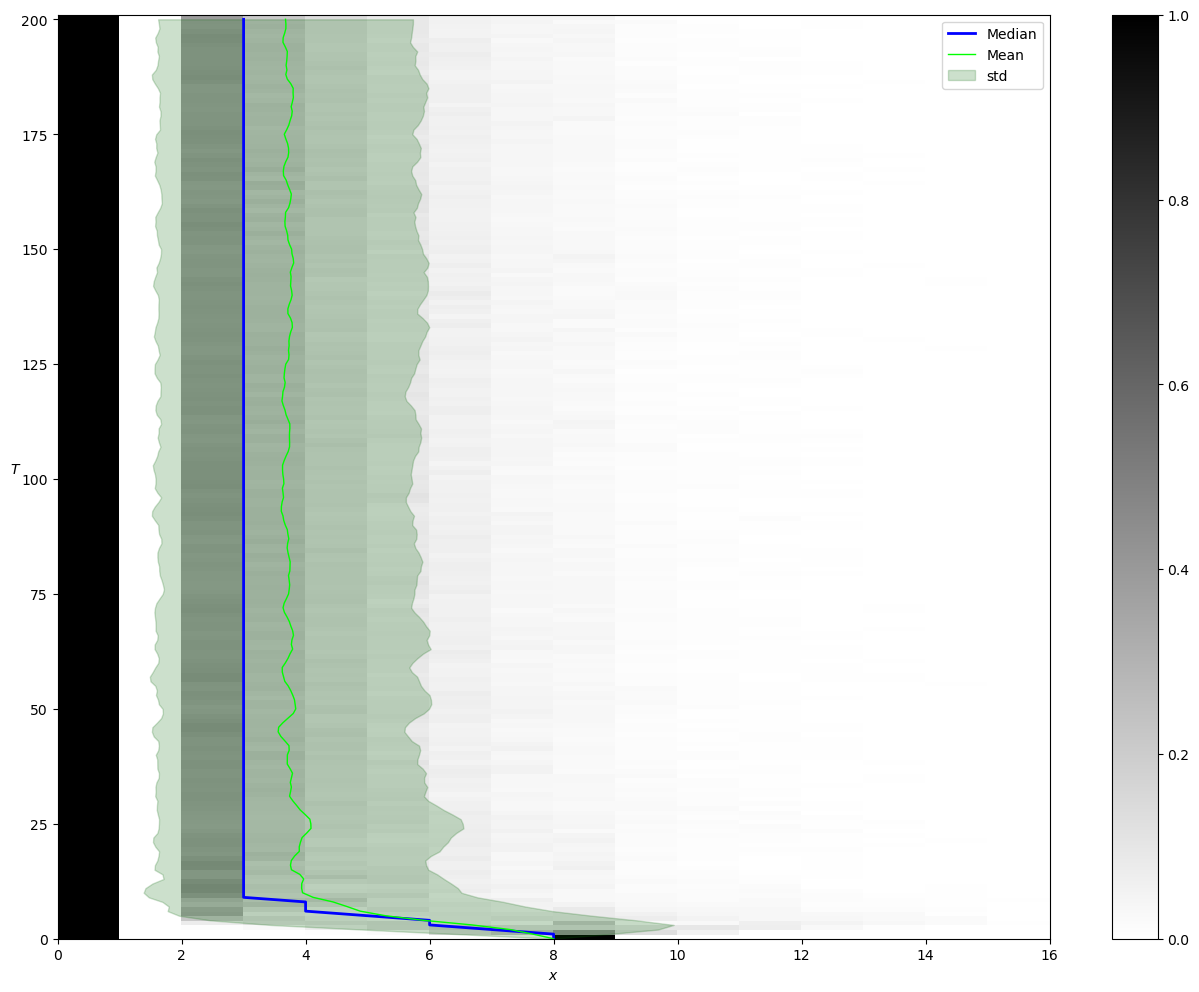

J=1.0


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 267.08it/s]


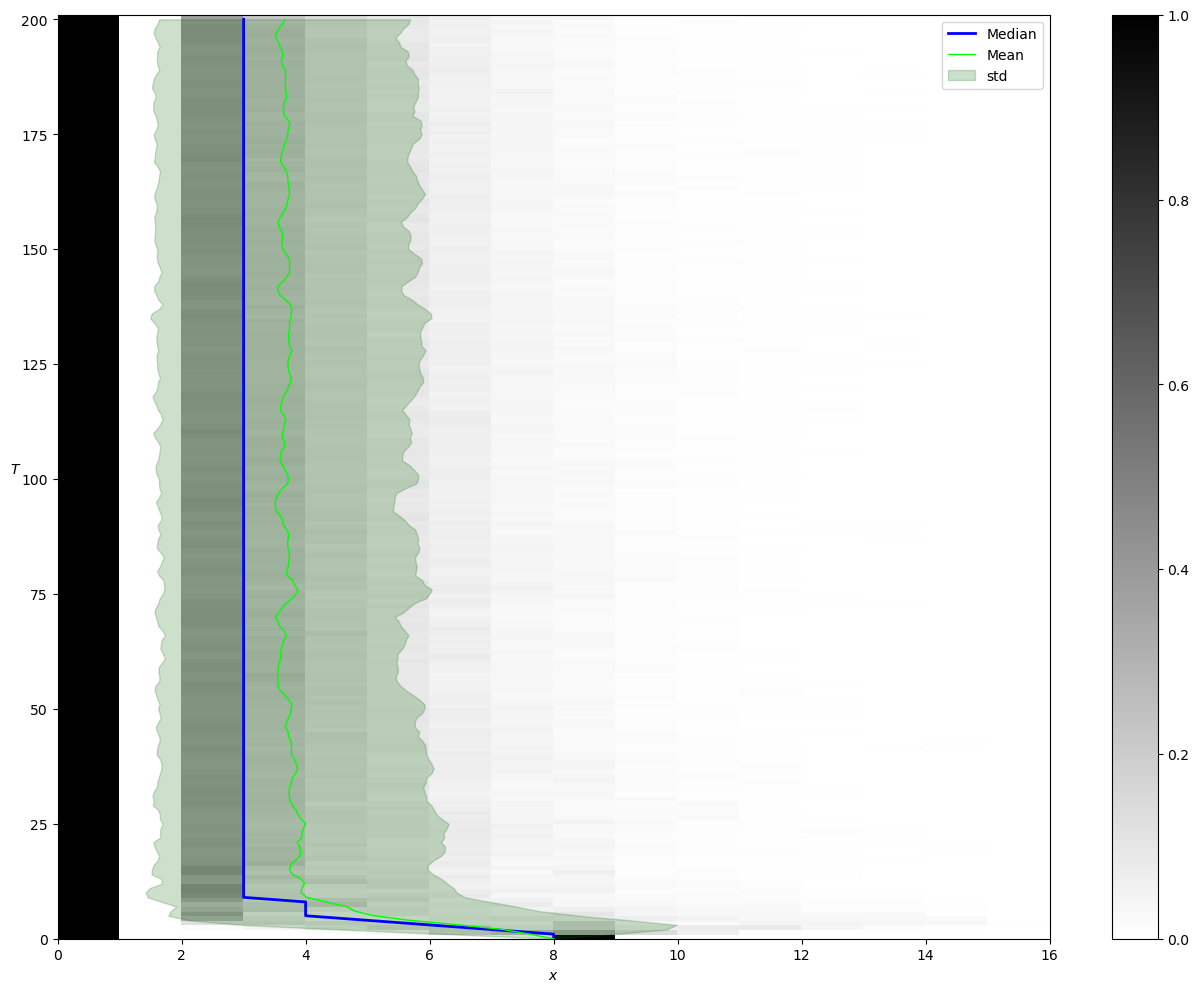

In [711]:
for i in np.linspace(0.1,1,10):
    print("J={}".format(i))
    plot_rho(analyze(quantum_evolution(L16, 200, H16,d=d16, J=i)), 16)

J=0.001


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:22<00:00, 361.53it/s]


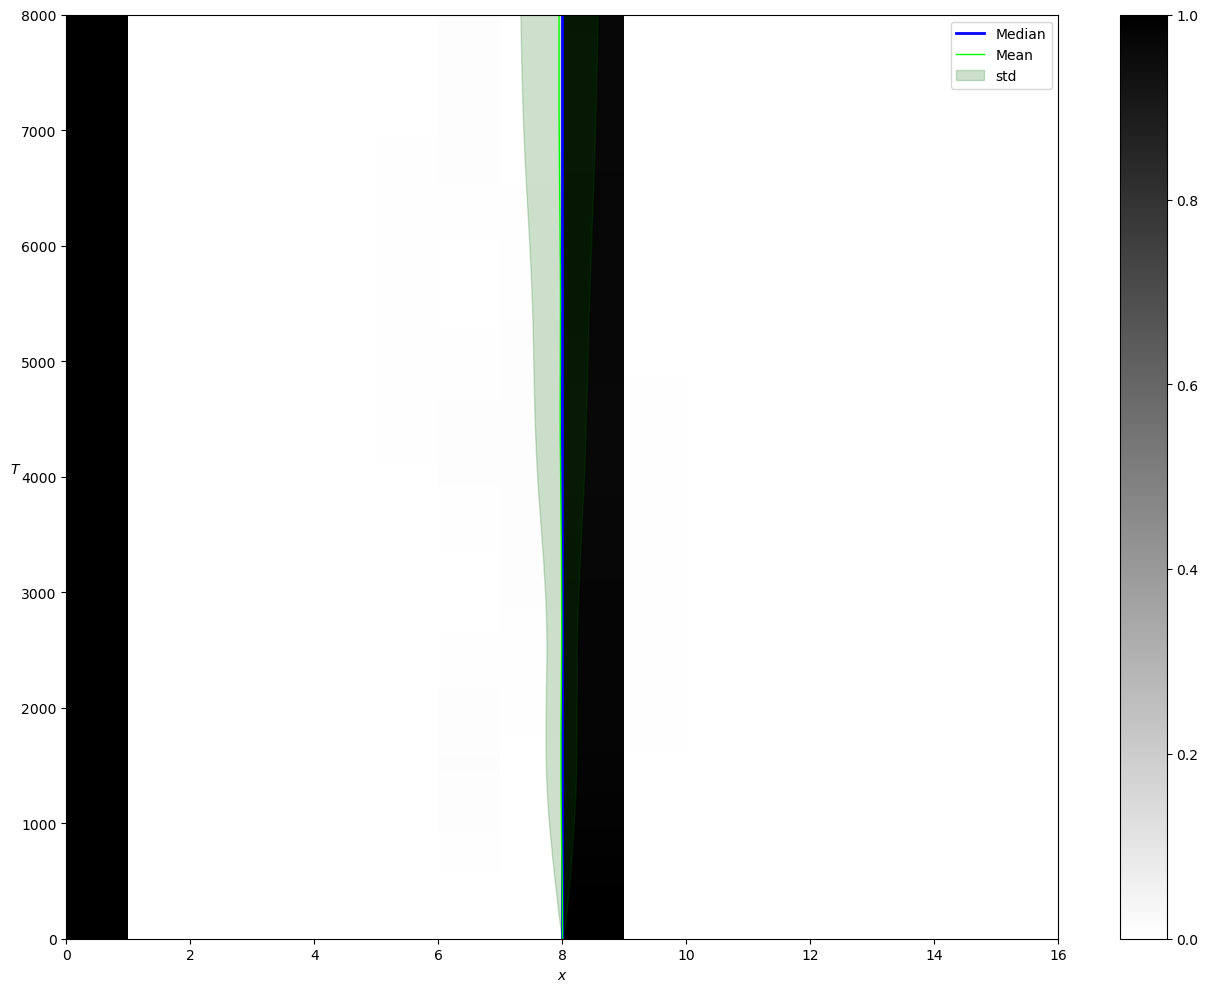

J=0.015875


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:23<00:00, 337.69it/s]


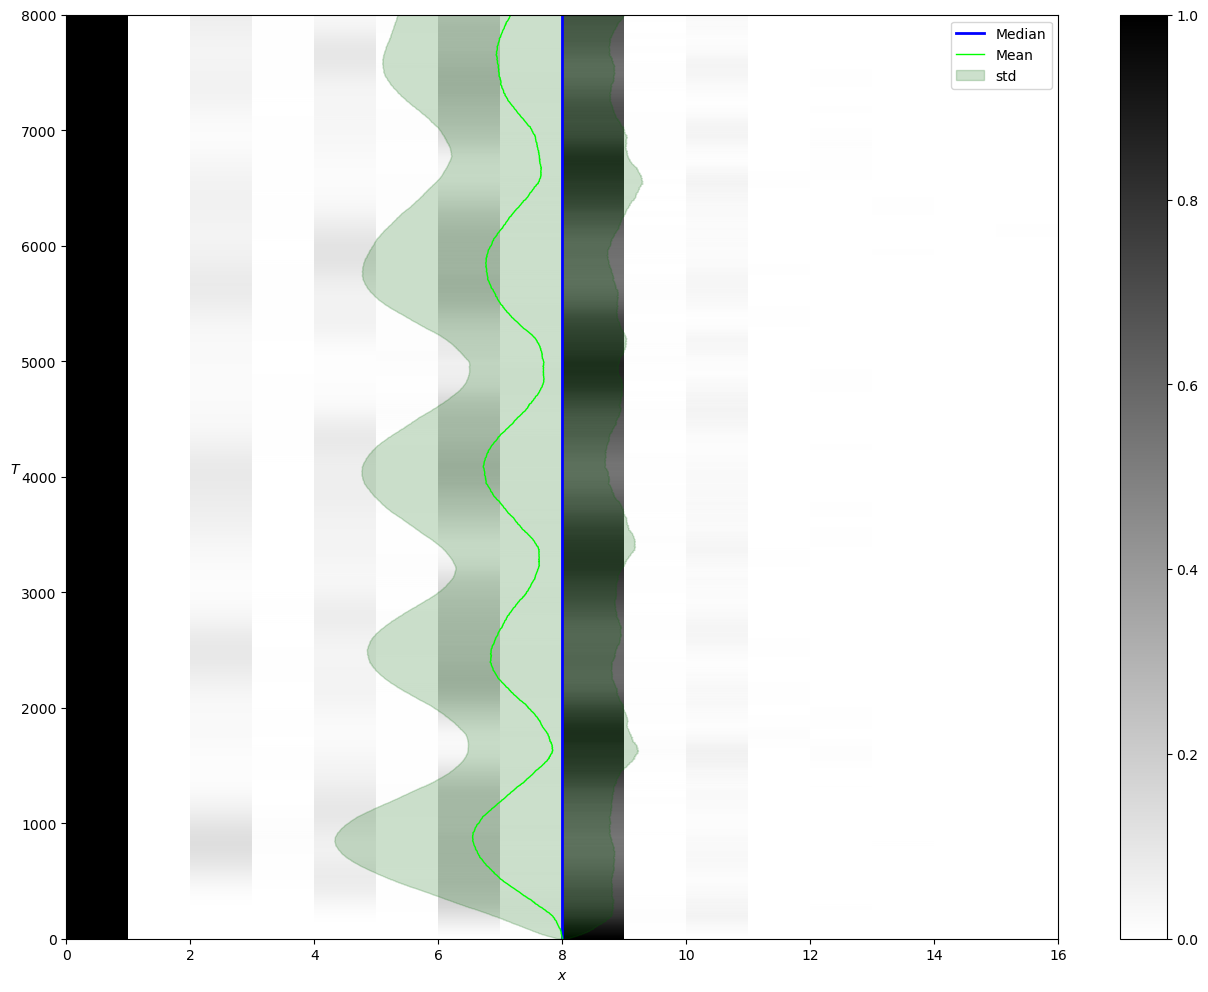

J=0.03075


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:25<00:00, 311.68it/s]


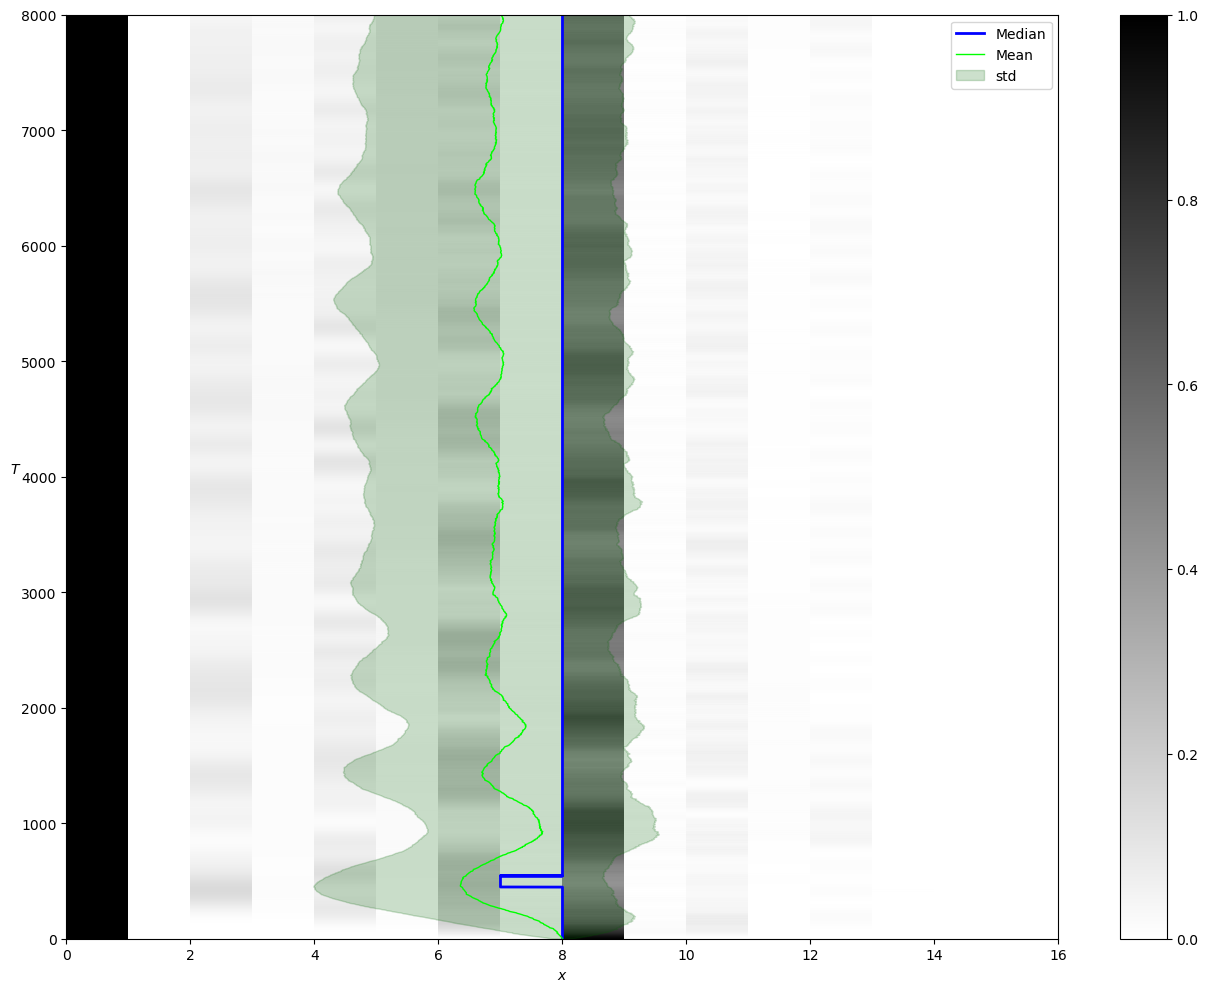

J=0.045625


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:25<00:00, 308.80it/s]


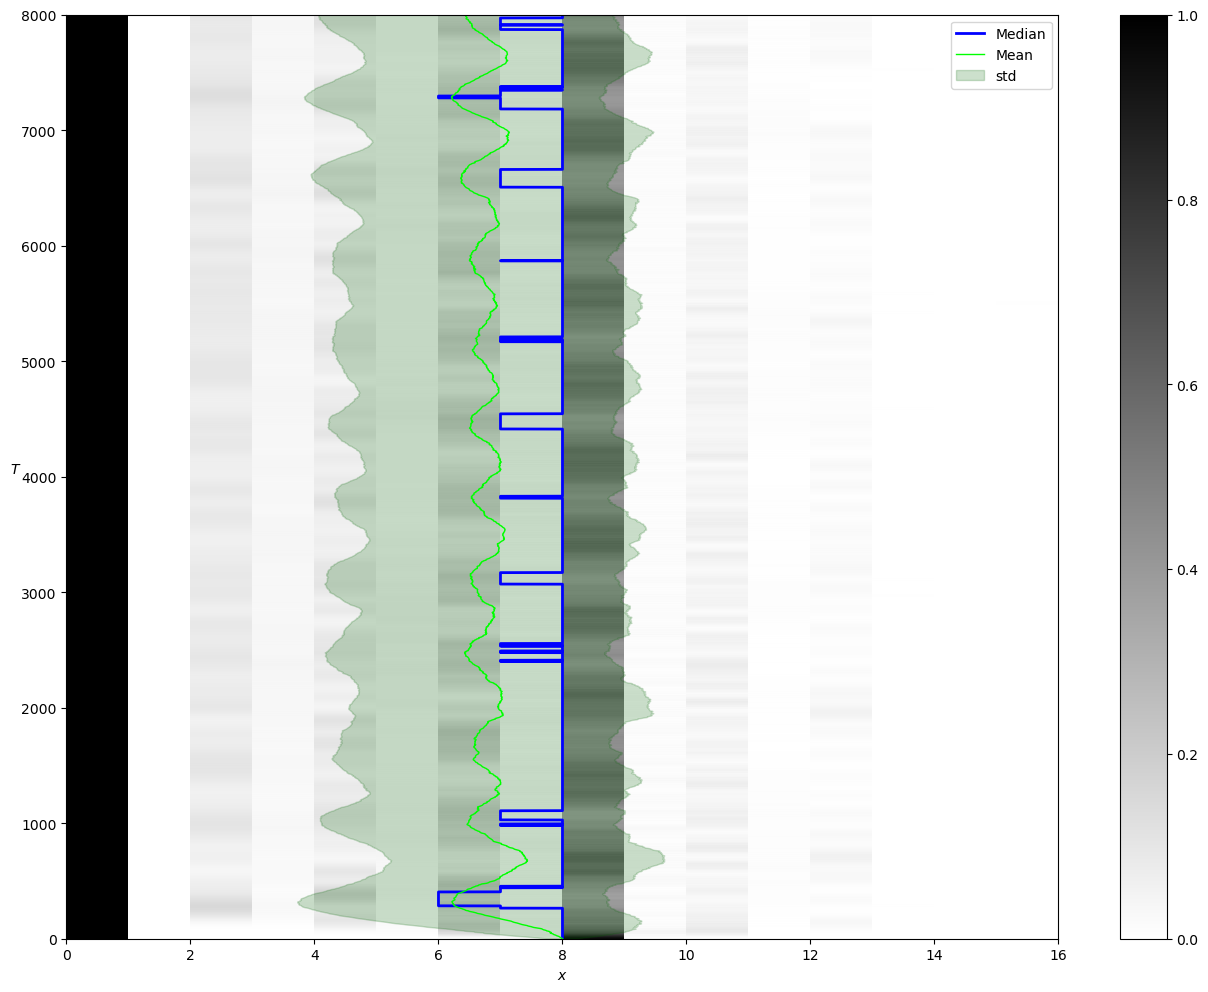

J=0.0605


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:25<00:00, 314.68it/s]


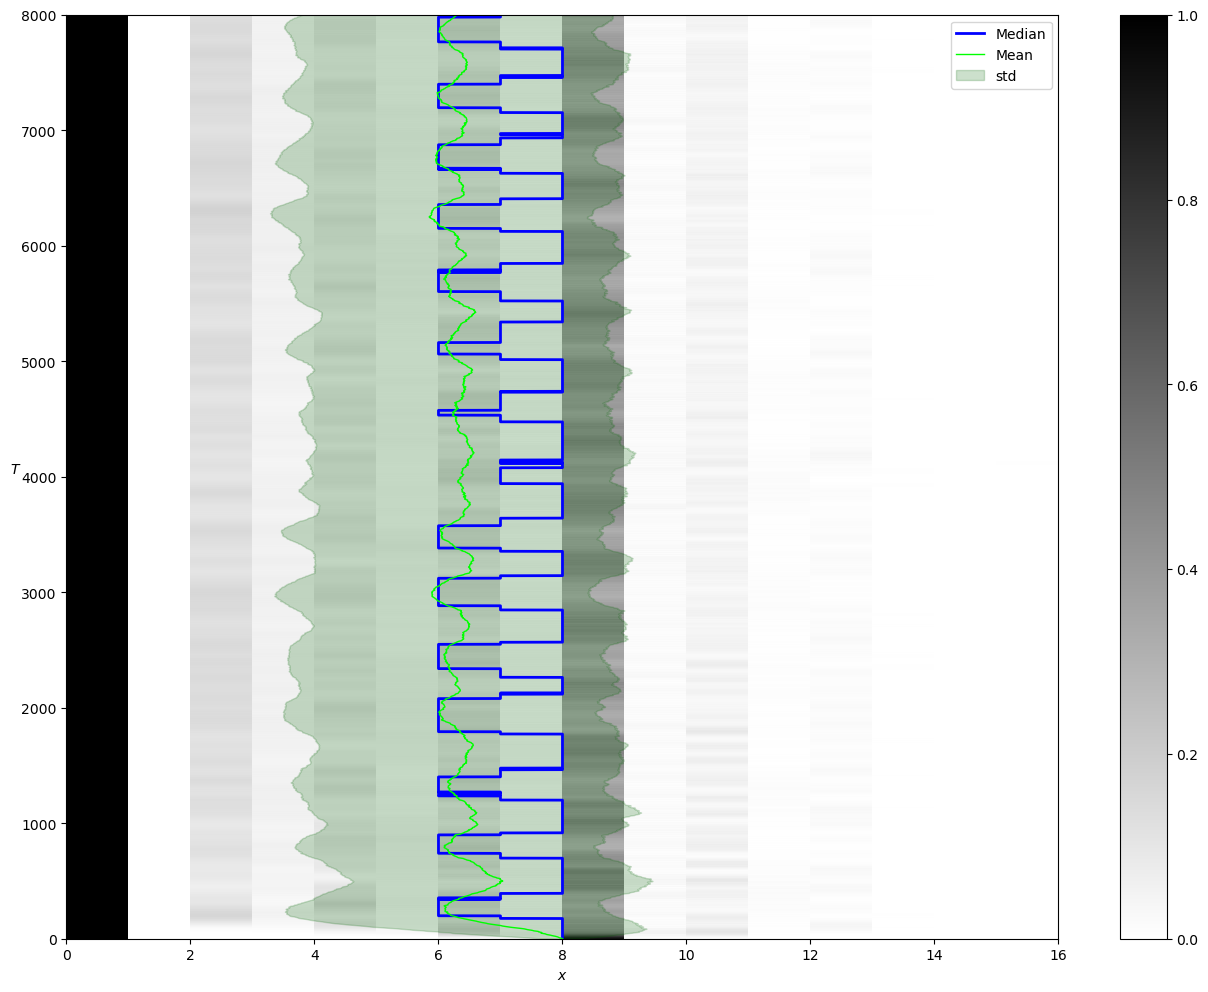

J=0.075375


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:25<00:00, 308.98it/s]


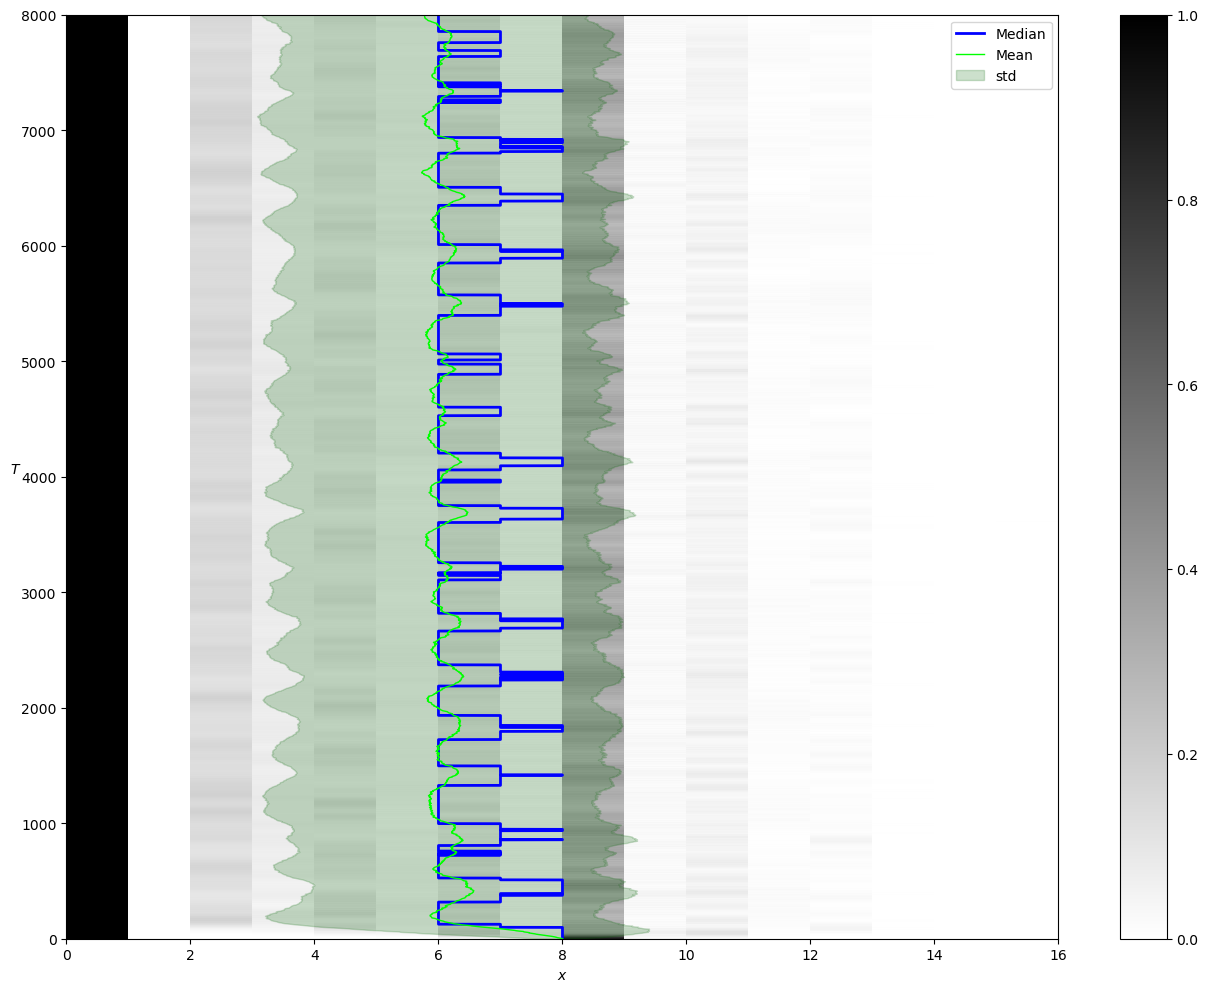

J=0.09025


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:25<00:00, 308.54it/s]


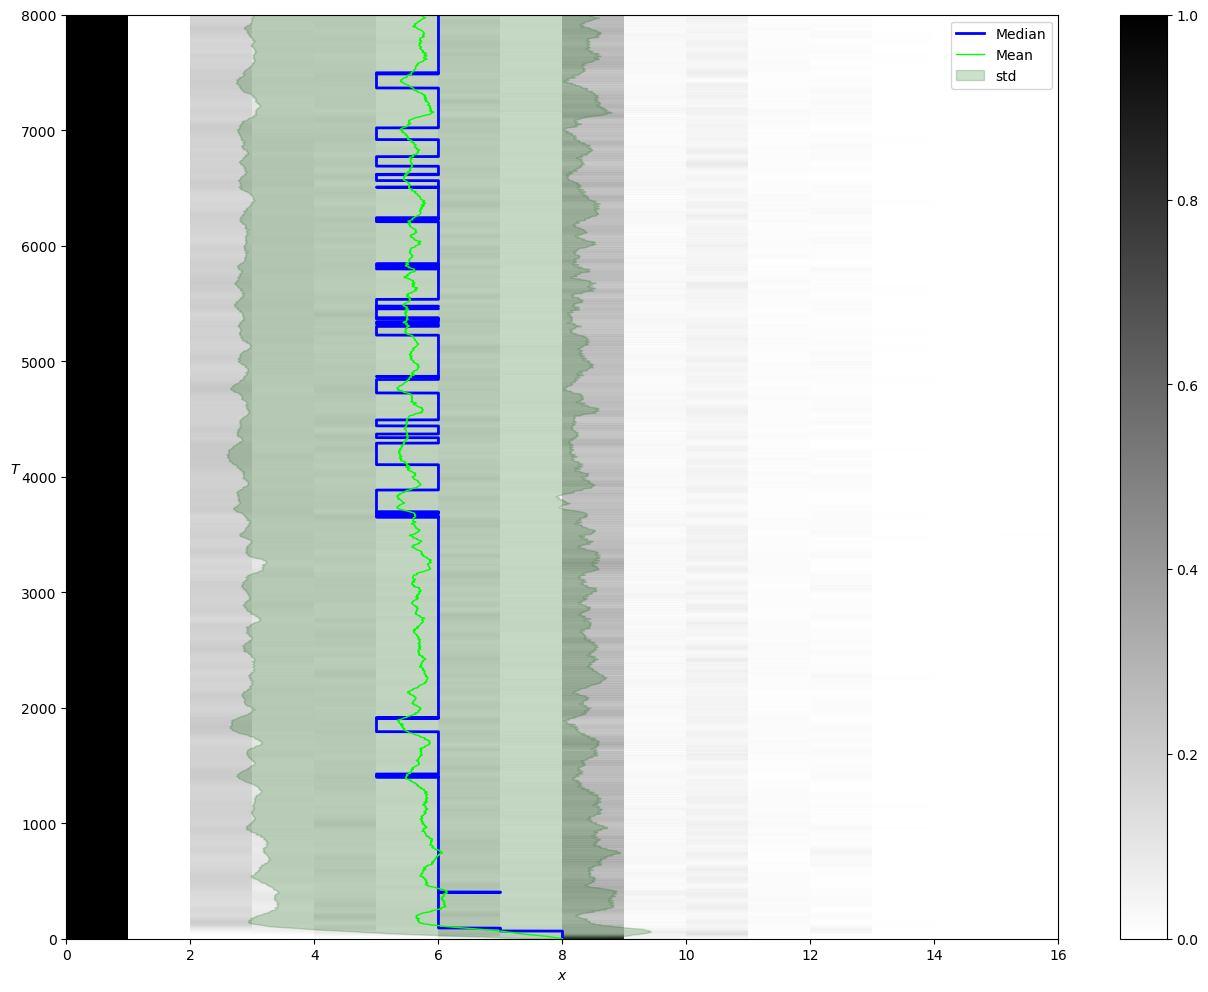

J=0.105125


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:26<00:00, 302.55it/s]


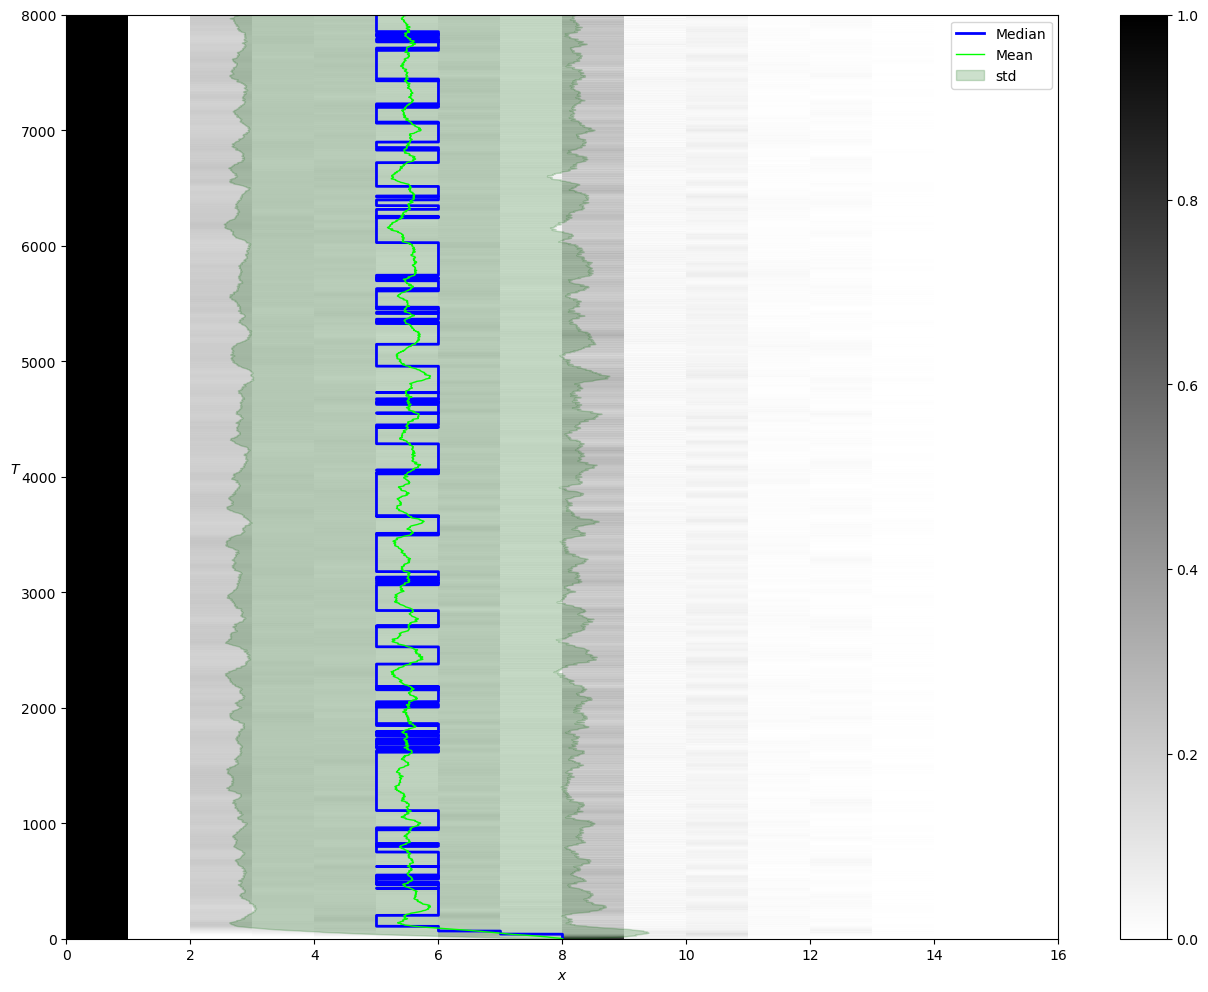

J=0.12


100%|█████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:26<00:00, 303.97it/s]


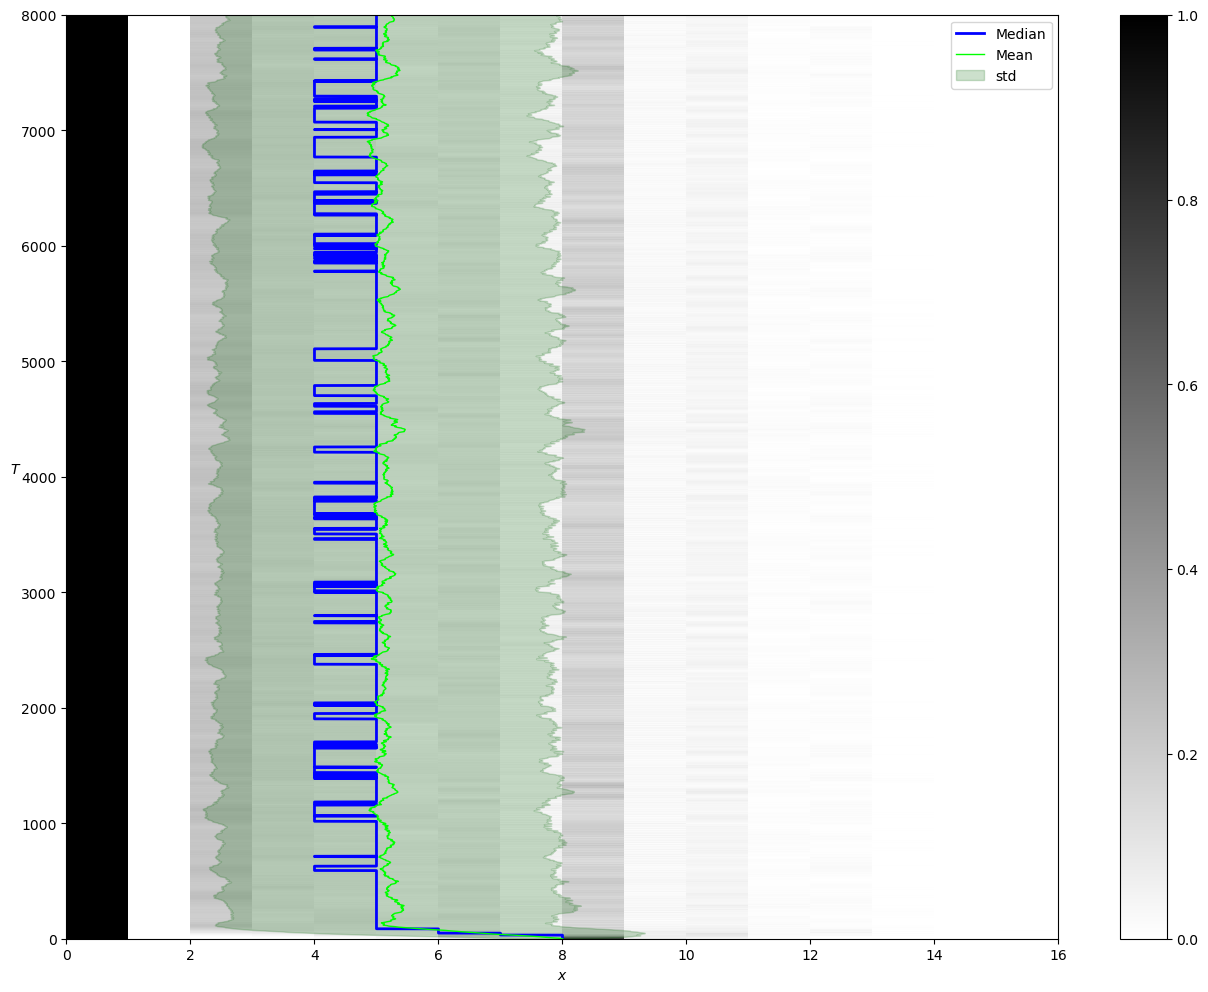

In [715]:
for i in np.linspace(0.001,0.12,9):
    print("J={}".format(i))
    plot_rho(analyze(quantum_evolution(L16, 8000, H16,d=d16, J=i)), 16)

In [3]:
L16 = 16
H_ring, H_hopp, configs = load_data(L16)

File not found!
File not found!
File not found!


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[15]


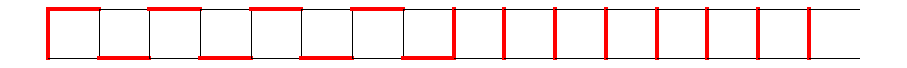

In [7]:
c# c0 =should be the same as the result of get_config(L) from the cpp code
c0 = np.zeros(3*L, dtype=np.int8)
c0[0] = 1
c0[2] = 1
d = 0
for i in range(1,L16//2+d):
    c0[3*i + 1 + (i+1)%2] = 1
for i in range(L16//2+d,L16):
    c0[3*i] = 1

plot_conf(c0)

i0 = np.where(np.dot(configs,c0)//np.sum(c0)==1)[0][0]
# plot_conf(configs[i0])
psi = np.zeros((1595,1))
psi[0] = 1
d= defect_density(configs,psi)
print(d)
print(np.argwhere(d==1)[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[15]


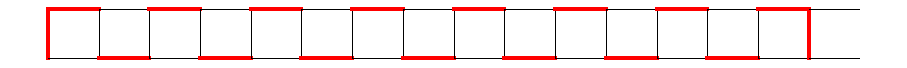

In [415]:
plot_conf(configs[0])

i0 = np.where(np.dot(configs,c0)//np.sum(c0)==1)[0][0]
# plot_conf(configs[i0])
psi = np.zeros((1595,1))
psi[0] = 1
d= defect_density(configs,psi)
print(d)
print(np.argwhere(d==1)[1])

In [411]:
defect_flow = []
for i, config in enumerate(configs):
    psi = np.zeros((1595,1))
    psi[i] = 1
    d = defect_density(configs,psi)
    defect = np.argwhere(d==1)[1][0]
    
    def_list = []
    config_nexts = np.hstack((H_hopp[i].nonzero()[1],H_ring[i].nonzero()[1]))
    for n in config_nexts:
        psi = np.zeros((1595,1))
        psi[n] = 1
        d = defect_density(configs,psi)
        defect_next = np.argwhere(d==1)[1][0]
        
        def_list.append(defect_next)
    if def_list:
        avg_next = np.sum((np.array(def_list) - defect)/len(def_list))
    else:
        avg_next = 0
    defect_flow.append((defect,def_list,avg_next))

In [413]:
for i in range(10):
    print(defect_flow[i])

(15, [14, 14, 13], -1.3333333333333333)
(14, [15, 13, 12, 14], -0.5)
(14, [15, 13, 13, 12, 14], -0.6000000000000001)
(13, [15, 14, 12, 11, 13], 5.551115123125783e-17)
(13, [14, 12, 12, 11, 13], -0.6000000000000001)
(13, [14, 12, 12, 11, 13, 13], -0.5)
(12, [14, 13, 11, 10, 12, 12], 5.551115123125783e-17)
(12, [14, 13, 11, 10, 12, 12], 5.551115123125783e-17)
(12, [13, 11, 11, 10, 12], -0.6000000000000001)
(12, [13, 11, 11, 10, 12, 12], -0.5)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
------------------------------------------------
[15]
[14]
[12]
[11]
[13]


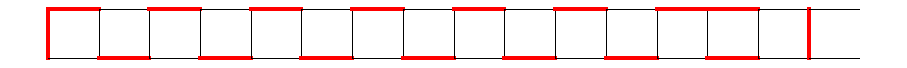

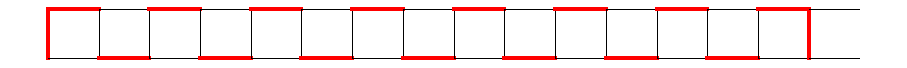

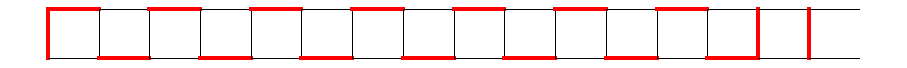

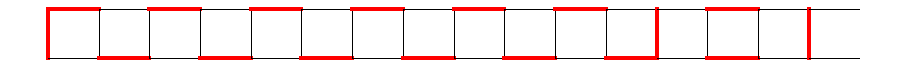

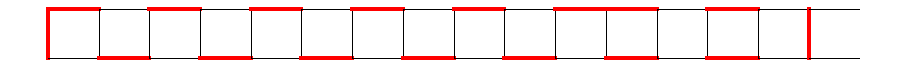

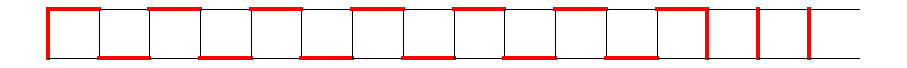

In [420]:
x=3
psi = np.zeros((1595,1))
psi[x] = 1
plot_conf(configs[x])
print(defect_density(configs,psi))
print("------------------------------------------------")
for j in np.hstack((H_hopp[x].nonzero()[1],H_ring[x].nonzero()[1])):
    plot_conf(configs[j])
    psi_next = np.zeros((1595,1))
    psi_next[j] = 1
    d= defect_density(configs,psi_next)
    print(np.argwhere(d==1)[1])

['101', '010', '001', '010', '001', '010', '001', '010', '001', '010', '001', '010', '001', '010', '001', '100']
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


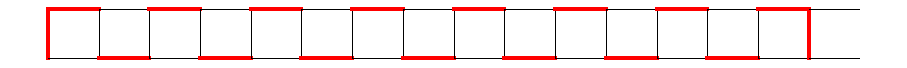

In [247]:
plot_conf(configs[0])
psi = np.zeros(1595)
psi[0] = 1
print(defect_density(configs,psi))

In [248]:
dim = H_ring.shape[0]
psi = np.zeros(dim)

psi[0] = 1/np.sqrt(2)
psi[10] = 1/np.sqrt(2)

print(defect_density(configs,psi))

[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5]


In [20]:
L = 16
times = 200000
# q_rho = quantum_evolution(L, times, d = 5)
# with open('quantum_200000.pickle', 'wb') as handle:
#     pickle.dump(q_rho, handle)
q_rho = pickle.load( open( 'quantum_200000.pickle', "rb" ) )
q_mean, q_std = np.mean(q_rho,axis=1), np.std(q_rho,axis=1)

In [9]:
c_rho, steps = classical_evolution(L, 500000)
# with open('classical_500000.pickle', 'wb') as handle:
#     pickle.dump((c_rho, steps), handle)
c_rho, steps = pickle.load( open( 'classical_500000.pickle', "rb" ) )

1595 10538
1595 4404
1595 48


100%|█████████████████████████████████| 500000/500000 [03:41<00:00, 2253.88it/s]


In [12]:
c_rho= pickle.load( open( 'classical_2000000.pickle', "rb" ) )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


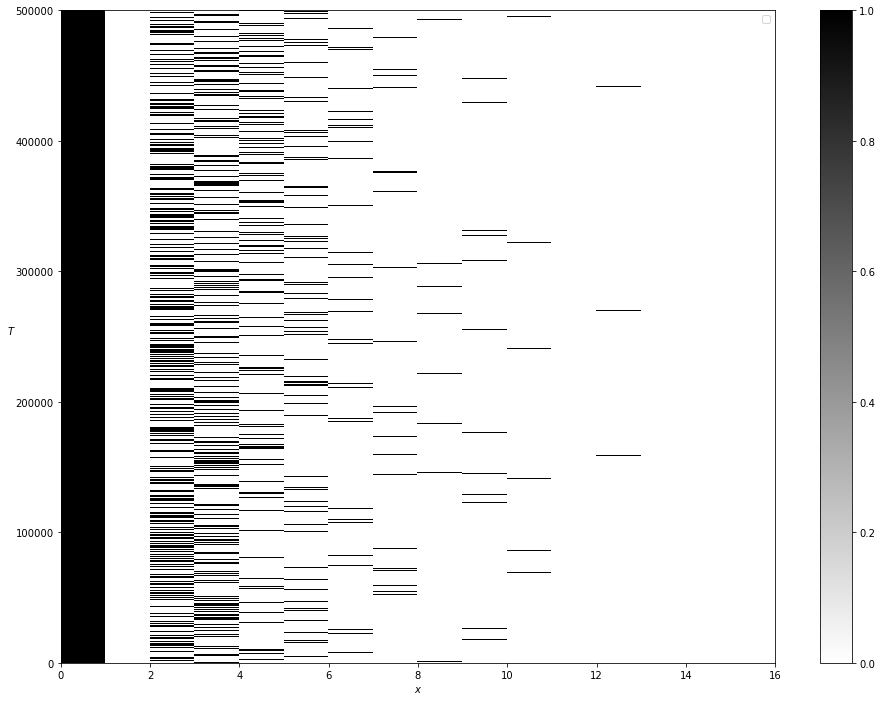

In [10]:
plot_rho(c_rho, 16)

[0.00010272560098345689,
 0.00010258623671214444,
 0.00010604701784020621,
 0.00011348303502776262,
 0.00013619808863103618,
 0.00015450503189486415,
 0.00019666738816789467,
 0.0003073755972658482,
 0.0009491549095049399]

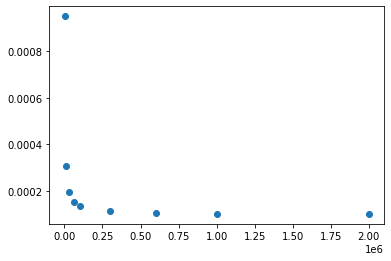

In [219]:
times = [0, 1000000, 1400000, 1700000, 1900000, 1940000, 1970000, 1990000, 1999000] 
steps_std_rev = [np.std(np.bincount(steps[t:]))/(len(steps) - t) for t in times]
plt.scatter([len(steps) - t for t in times], steps_std_rev)
steps_std_rev

In [ ]:
plot_rho(classical_evolution(L, 2000000)[0], 20000001)

1595 10538
1595 4404
1595 48


100%|███████████████████████████████| 2000000/2000000 [17:26<00:00, 1911.98it/s]


In [103]:
L16 = 16
H16 = load_data(L16)

1595 10538
1595 4404
1595 48


In [ ]:
plot_rho(quantum_evolution(L16, 1000000, H16, d=6), L16, True)

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [1:05:25<00:00, 254.73it/s]


From Michael Knap to Everyone 09:22 AM
https://arxiv.org/abs/1509.06411
From Frank Pollmann to Everyone 09:29 AM
https://arxiv.org/pdf/0809.3051.pdf
From Michael Knap to Everyone 09:31 AM
https://arxiv.org/pdf/2105.11465.pdf
From Frank Pollmann to Everyone 09:45 AM
https://link.aps.org/pdf/10.1103/PhysRevX.8.021013

231 1024
231 634
231 36


100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [04:55<00:00, 203.12it/s]


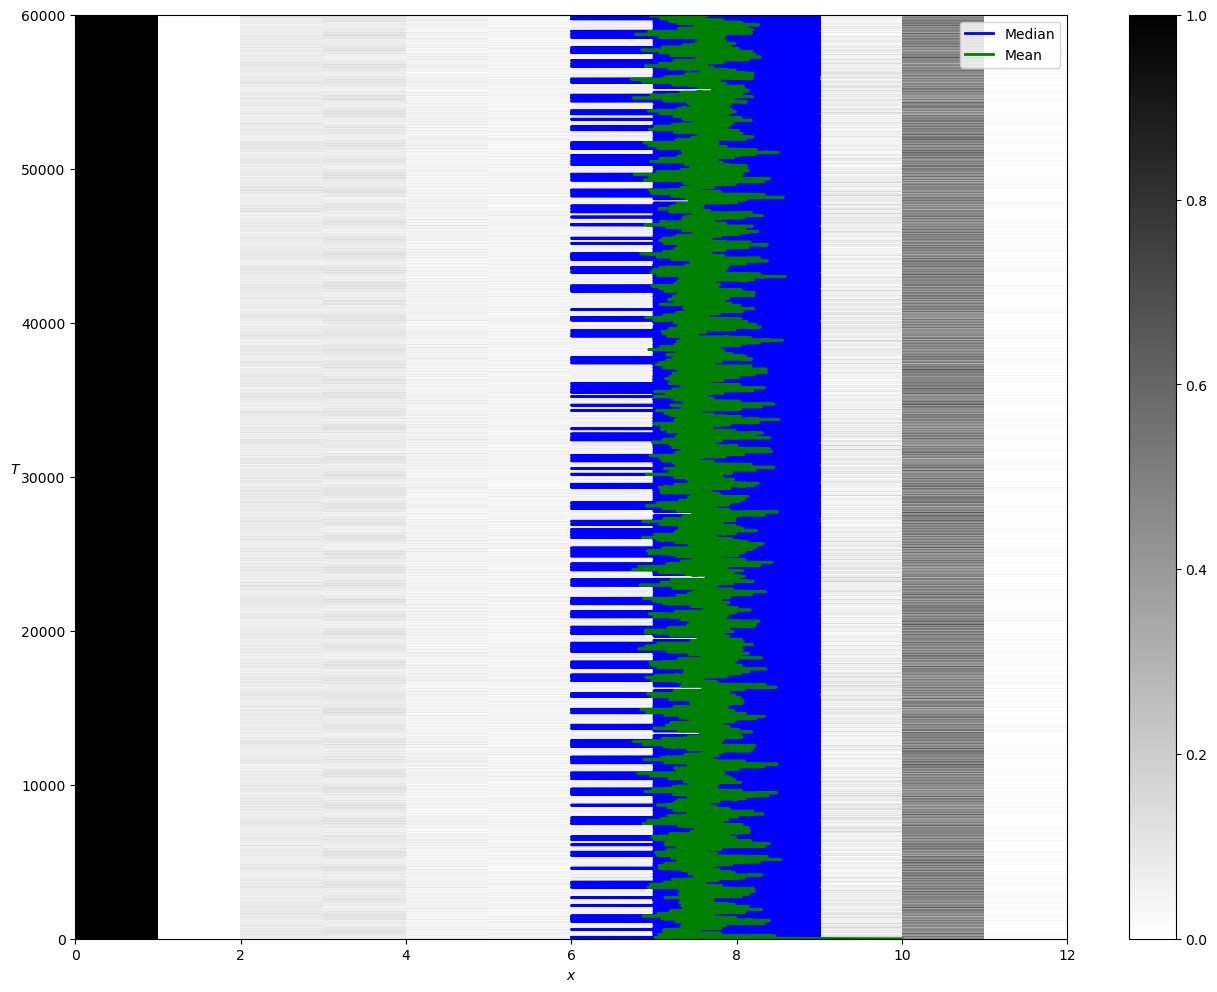

In [56]:
L12 = 12
H12 = load_data(L12)
plot_rho(quantum_evolution(L12, 60000, d = 4), L12, True)

In [65]:
L11 = 11
H11 = load_data(L11)

142 554
142 388
142 33


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 806.94it/s]


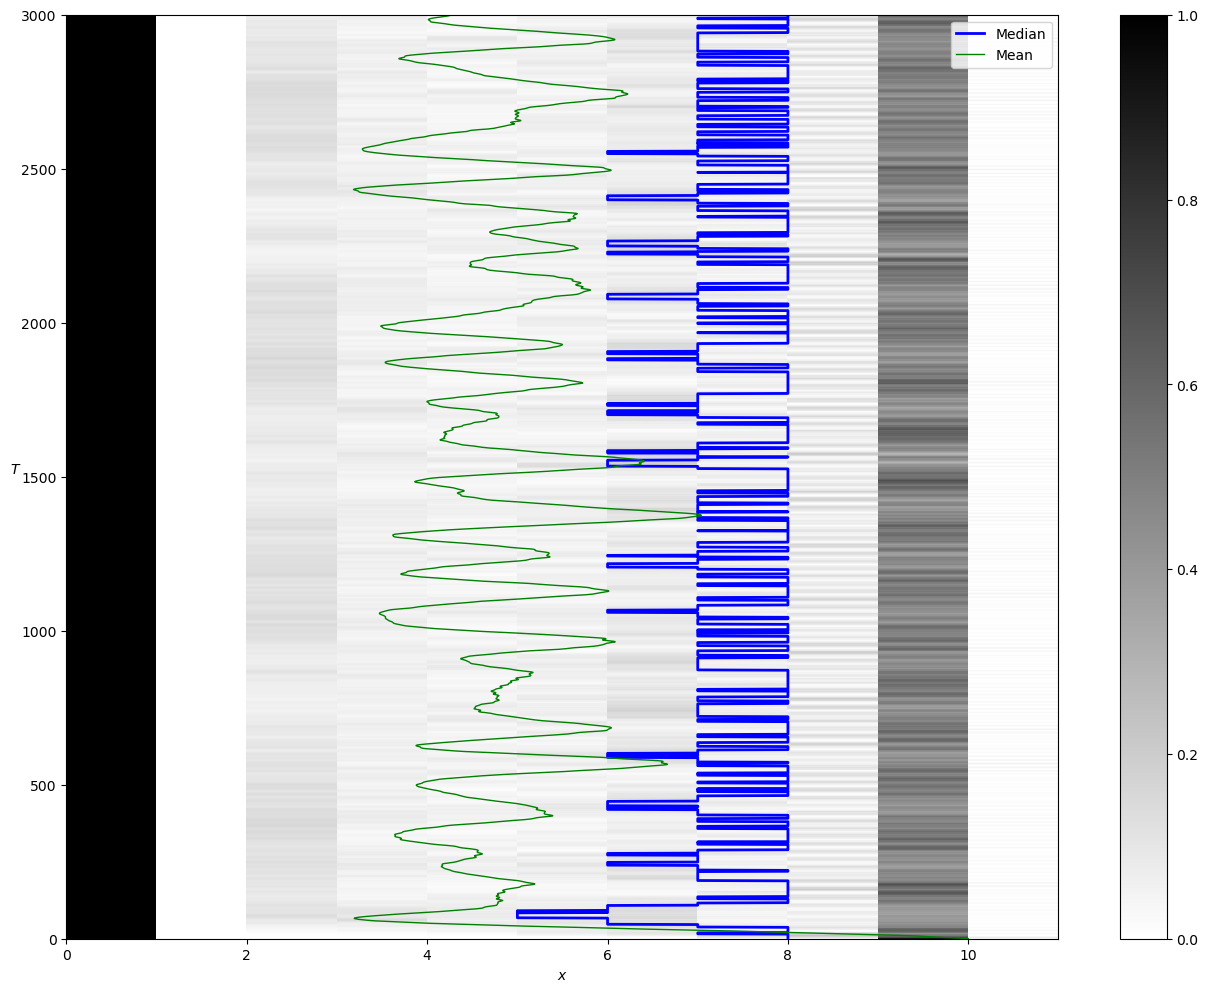

In [67]:
q_rho11 = quantum_evolution(L11, 3000, H11, d = 4)
plot_rho(q_rho11, L11, True)

In [68]:
L22 = 22
H22 = load_data(L22)

28655 284110
28655 79196
28655 66


100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [06:39<00:00, 15.02it/s]


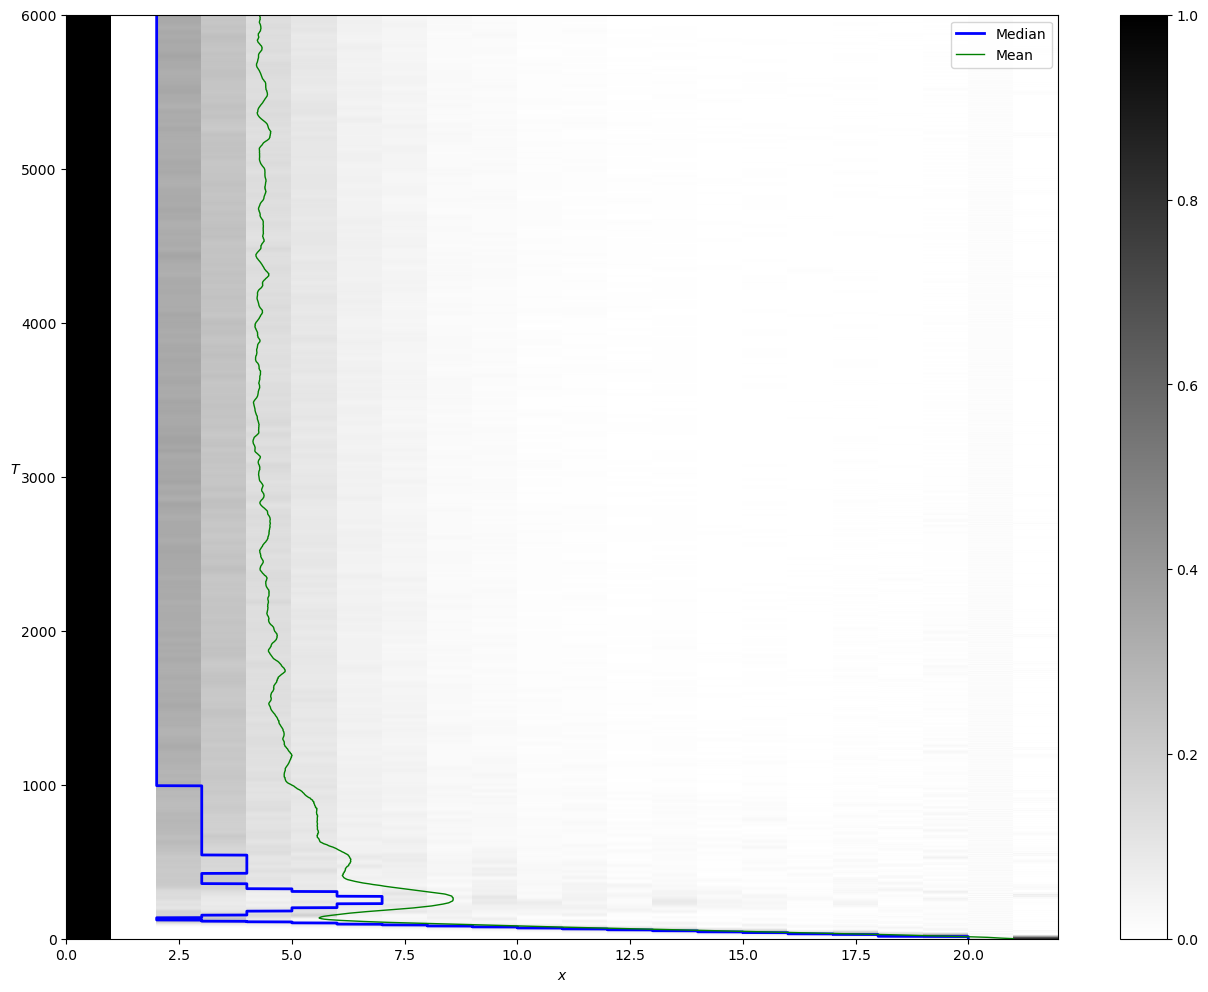

In [93]:
plot_rho(quantum_evolution(L22, 6000, H22, d = 10), L22, True)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [04:24<00:00, 15.13it/s]


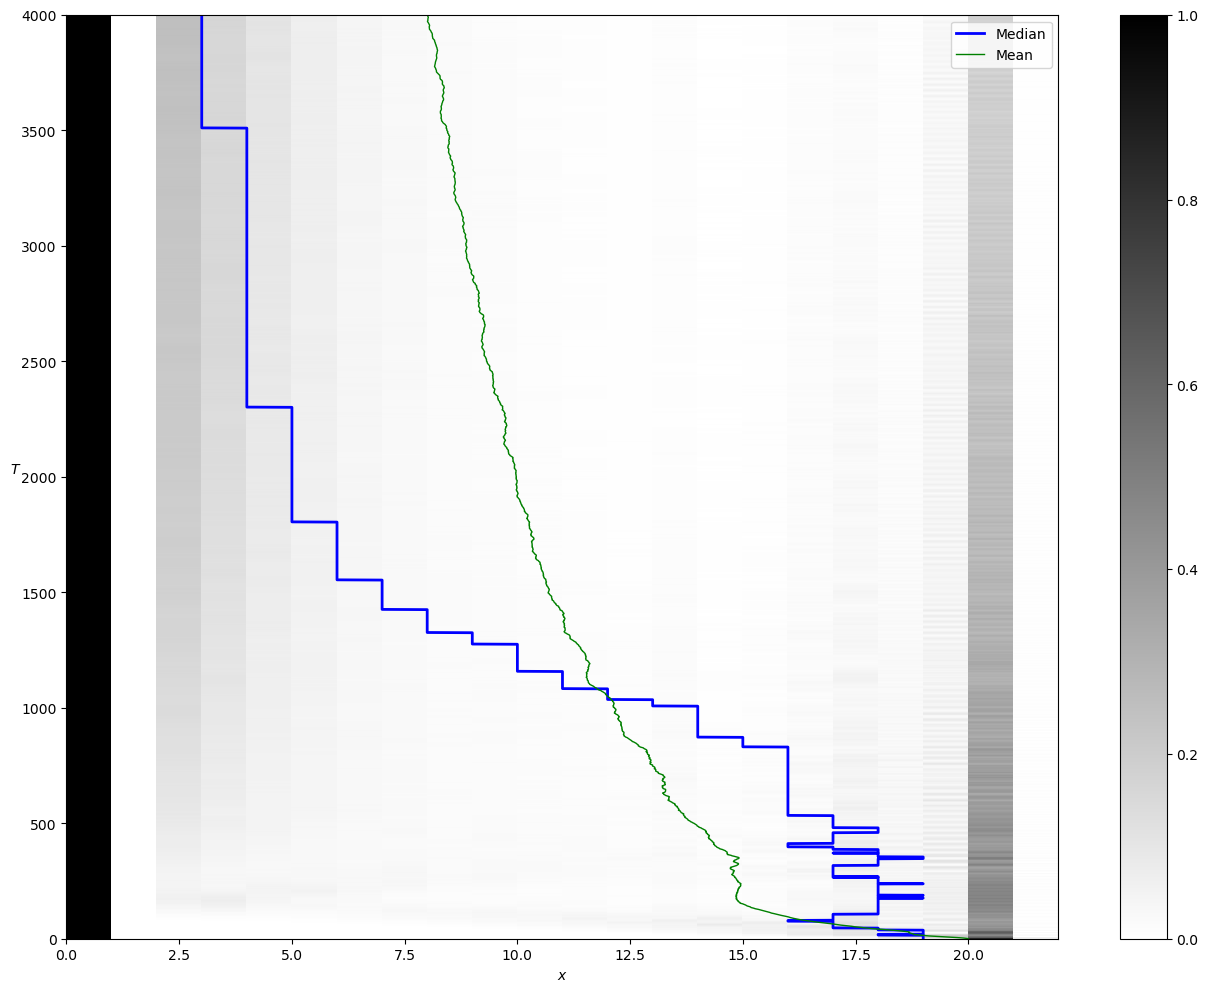

In [90]:
plot_rho(quantum_evolution(L22, 4000, H22, d = 9), L22, True)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [04:43<00:00, 14.12it/s]


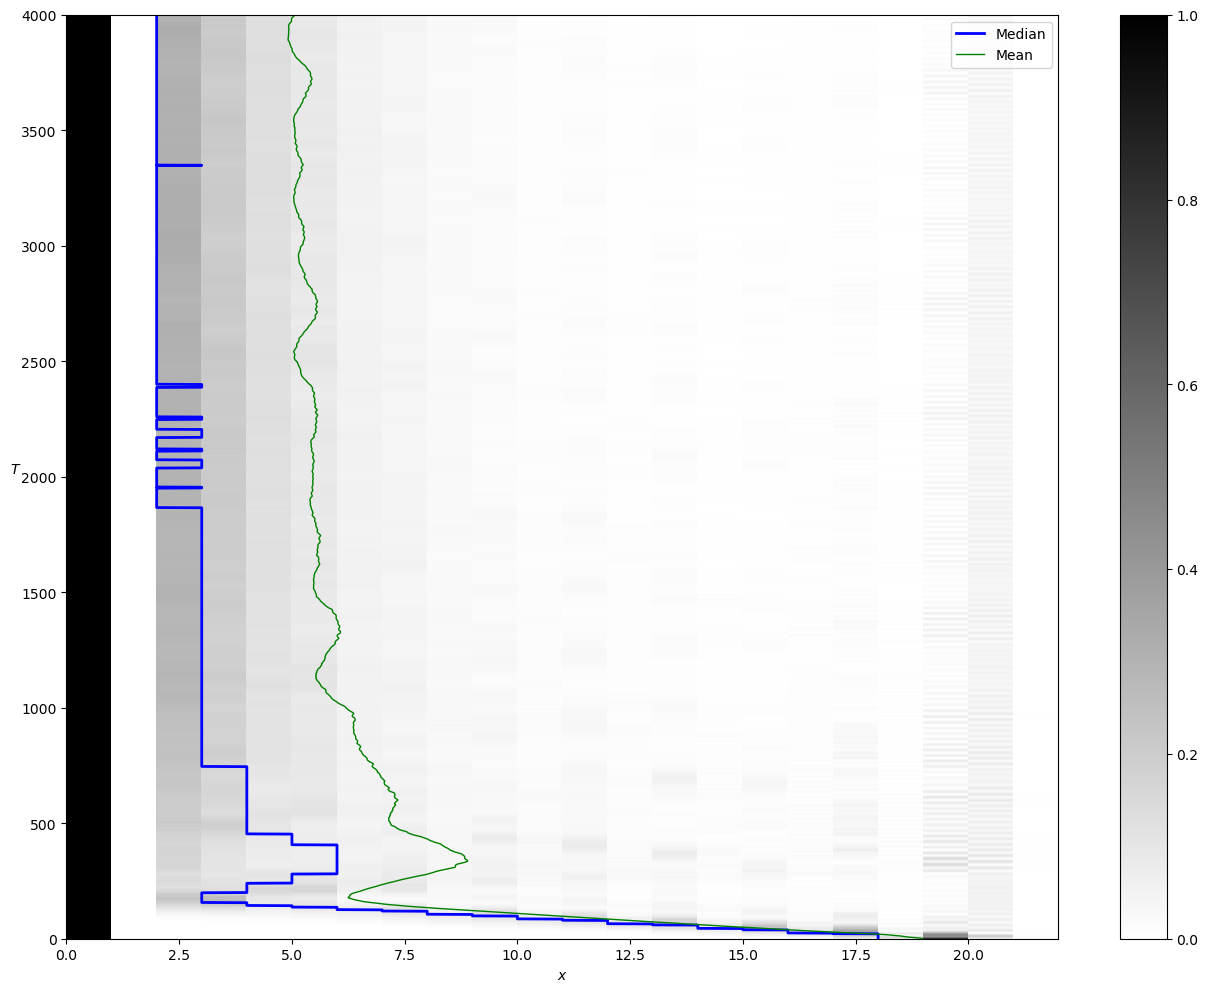

In [94]:
plot_rho(quantum_evolution(L22, 4000, H22, d = 8), L22, True)

In [96]:
L25 = 25
H25 = load_data(L25)

121391 1404816
121391 335512
121391 75


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [03:16<00:00,  2.03it/s]


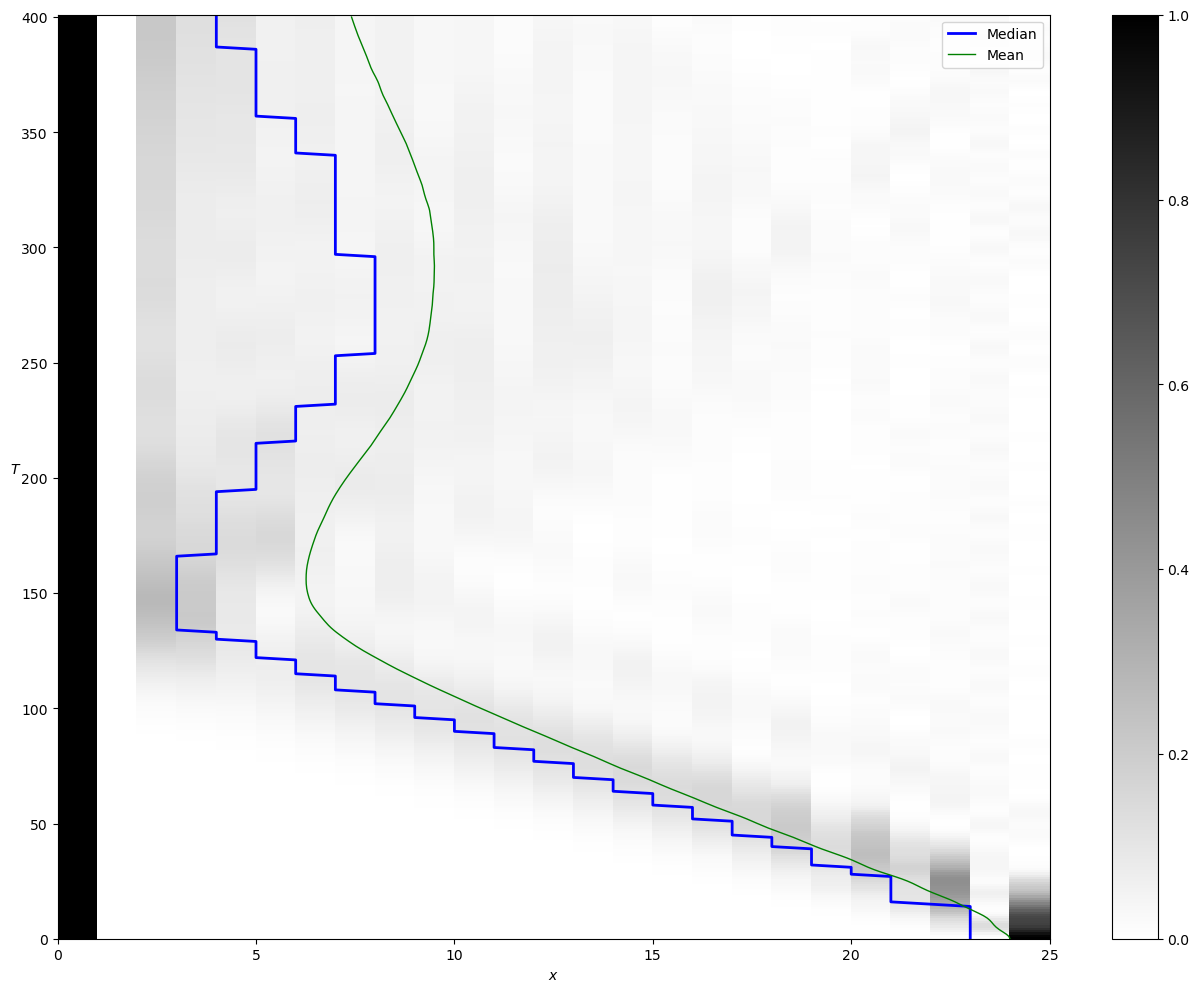

In [98]:
plot_rho(quantum_evolution(L25, 4000, H25, d = 12), L25, True)

100%|████████████████████████████████████████████████████████████████████████████| 4000/4000 [9:12:17<00:00,  8.28s/it]


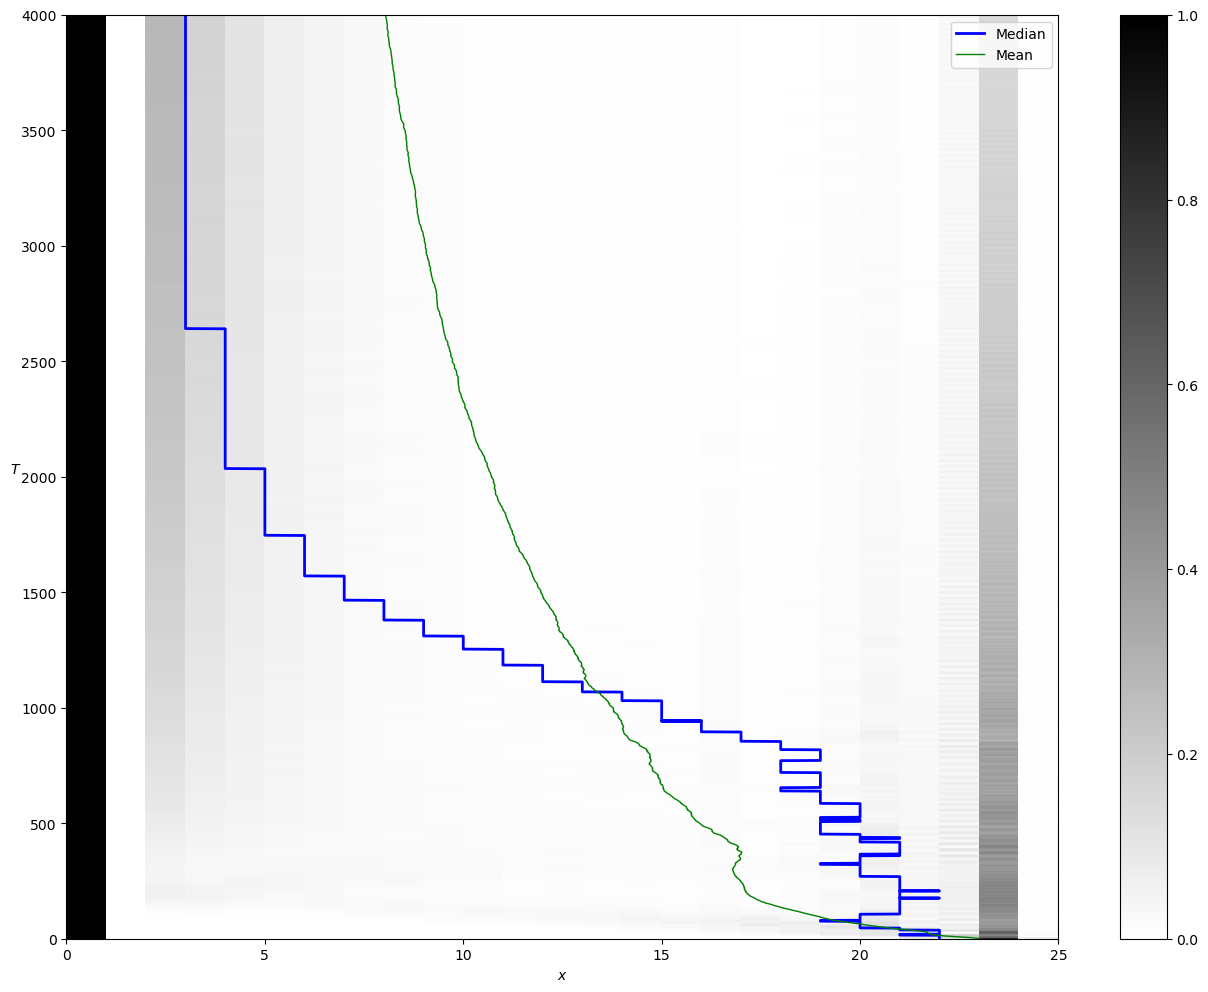

In [101]:
plot_rho(quantum_evolution(L25, 4000, H25, d = 11), L25, True)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [23:49<00:00,  2.80it/s]


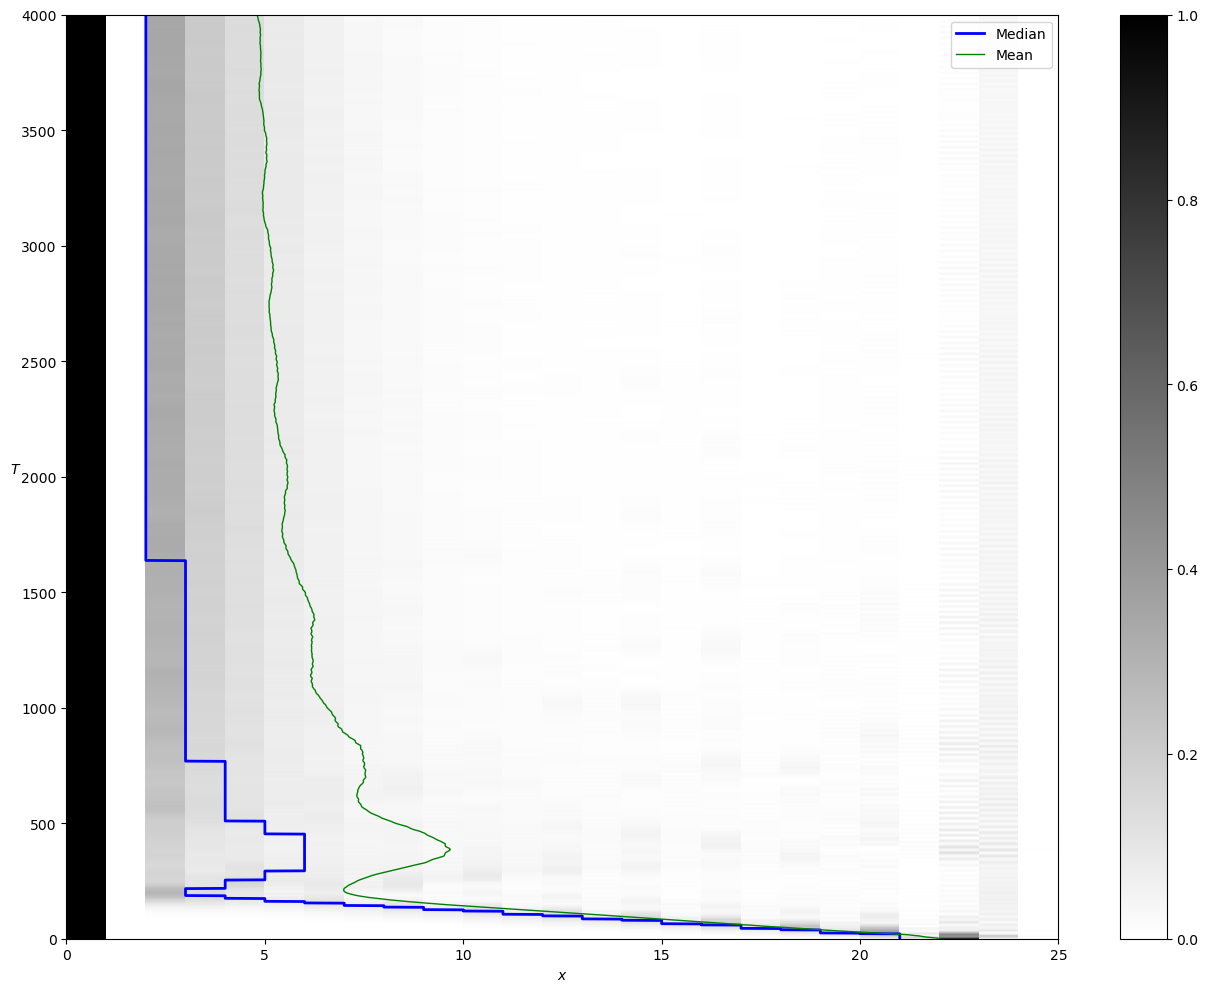

In [102]:
plot_rho(quantum_evolution(L25, 4000, H25, d = 10), L25, True)